In [1]:
import os
import cv2
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset

D:\Users\Alex\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torchvision

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
from functions_v2 import(import_train_folder_dataset_2, 
                      Data_2, 
                      plot_loss_accuracy, 
                      accuracy_given_set,
                      import_test_folder_dataset_2,
                      Data_test_2,
                      make_predictions,
                      save_predictions_as_csv,
                      save_model,
                      save_metrics)

# 1. Build your own convolutional neural network using pytorch

In [4]:
# Learning parameters.
epochs = 500 # Number of epochs to train the model
lr = 0.01 # Learning rate.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


TRAIN_BATCH_SIZE = 16
TEST_BATCH_SIZE = 8

checkpoints_save = 100 # Save after 100 epochs


model_checkpoints = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 1/CheckPoints/"

cuda


In [5]:
#PyTorch - Building the Model
class ClassificationNet(nn.Module):
    def __init__(self):
        super(ClassificationNet, self).__init__()
        
        '''
        In dimension:              224 * 224 * 3 
        Out dimension Conv:        224 * 224 * 16
        Out dimension MaxPooling:  112 * 112 * 16
        '''
        self.cnn1_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=9, stride=1, padding=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        )
        
        self.cnn1_Res = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=1, stride=1, padding=0) 
        self.batch1 = nn.BatchNorm2d(16)
        self.maxpool1 = nn.MaxPool2d(2, stride=2)
        
        
        '''
        In dimension:              112 * 112 * 16
        Out dimension Conv:        112 * 112 * 32
        Out dimension MaxPooling:  56  * 56  * 32
        '''
        self.cnn2_model = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=9, stride=1, padding=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        )
        self.cnn2_Res = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1, stride=1, padding=0) 
        self.batch2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              56  * 56  * 32
        Out dimension Conv:        56  * 56  * 64
        Out dimension MaxPooling:  28  * 28  * 64
        '''
        self.cnn3_model = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        )
        self.cnn3_Res = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=0) 
        self.batch3 = nn.BatchNorm2d(64)
        self.maxpool3 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              28  * 28  * 64
        Out dimension Conv:        28  * 28  * 128
        Out dimension MaxPooling:  14  * 14  * 128
        '''
        self.cnn4_model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        )
        self.cnn4_Res = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch4 = nn.BatchNorm2d(128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              14  * 14  * 128
        Out dimension Conv:        14  * 14  * 128
        Out dimension MaxPooling:  7  * 7  * 128
        '''
        self.cnn5_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        )
        self.cnn5_Res = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch5 = nn.BatchNorm2d(128)
        self.maxpool5 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              7  * 7  * 128
        Out dimension Conv:        7  * 7  * 128
        Out dimension MaxPooling:  7  * 7  * 128
        '''
        self.cnn6_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        )
        self.cnn6_Res = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch6 = nn.BatchNorm2d(128)
        
        
        
        self.ffnn_model = nn.Sequential(
            nn.Linear(in_features=6272, out_features=512),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=4)
        )
        
        
        
    def forward(self, x): 
        
        residual = x
        # Convolution
        x = self.cnn1_model(x)
        # Residual
        residual = self.cnn1_Res(residual)
        x += residual
        x = self.batch1(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool1(x)
        
        
        residual = x
        # Convolution
        x = self.cnn2_model(x)
        # Residual
        residual = self.cnn2_Res(residual)
        x += residual
        x = self.batch2(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool2(x)
        
        
        residual = x
        # Convolution
        x = self.cnn3_model(x)
        # Residual
        residual = self.cnn3_Res(residual)
        x += residual
        x = self.batch3(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool3(x)
        
        
        residual = x
        # Convolution
        x = self.cnn4_model(x)
        # Residual
        residual = self.cnn4_Res(residual)
        x += residual
        x = self.batch4(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool4(x)
        
        
        residual = x
        # Convolution
        x = self.cnn5_model(x)
        # Residual
        residual = self.cnn5_Res(residual)
        x += residual
        x = self.batch5(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool5(x)
        
        
        residual = x
        # Convolution
        x = self.cnn6_model(x)
        # Residual
        residual = self.cnn6_Res(residual)
        x += residual
        x = self.batch6(x)
        x = F.relu(x) 
        
        
        x = torch.flatten(x,start_dim=1)
        #print("Flatten Out: ",x.shape)
        x = self.ffnn_model(x)
        #print("ffnn out: ",x.shape)
        x = torch.sigmoid(x)
        #print("Sigmoid Out: ",x.shape)
        return x

In [6]:
#PyTorch - Visualizing the Model
modelpy = ClassificationNet().to(device) # Get the model, and if there is a GPU use it
print("model created")
# Loss function.
criterion = nn.CrossEntropyLoss() # Set the loss function to cross entropy loss
# Optimizer.
optim = torch.optim.SGD(modelpy.parameters(), lr=lr)# , momentum=0.9, weight_decay=1e-3


# Check if checkpoint is available, if so, load it
epoch_check = 0
previous_time = 0
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="model_ckpt.pth"):
        print("Loading save chackpoint")
        checkpoint = torch.load(model_checkpoints + "model_ckpt.pth")
        modelpy.load_state_dict(checkpoint['model_state_dict'])
        modelpy.to(device)
        optim.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch_check = checkpoint['epoch']
        criterion = checkpoint['loss']
        previous_time = checkpoint['time']
        print(f"Epoch of the checkpoint: {epoch_check}")


modelpy

model created


ClassificationNet(
  (cnn1_model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn1_Res): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2_model): Sequential(
    (0): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn2_Res): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (m

In [7]:
# Model Parameters

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"Model Parameters: {count_parameters(modelpy)}")

Model Parameters: 4838148


# Load Data

In [8]:
# Path of the files
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Train"
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Test"

In [9]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation((-20,20)),
                                    transforms.Resize((275, 275)),
                                    #transforms.CenterCrop((224, 224)),
                                    transforms.RandomCrop((224, 224)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

img_transform_val = transforms.Compose([transforms.ToPILImage(),
                                        transforms.Resize((224, 224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [10]:
# Import the data into a resized 224x224 images
size_of_resized_img = (224,224) 
train_data, train_labels = import_train_folder_dataset_2(train_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", train_data.shape)
print("Dim of Lables: ", train_labels.shape)

Dim of Data:  (1149, 224, 224, 3)
Dim of Lables:  (1149,)


In [11]:
# Split into Train, Validation
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
print("Dim of Data: ", X_train.shape)
print("Dim of Lables: ", y_train.shape)
print("Dim of X_test: ", X_val.shape)
print("Dim of y_test: ", y_val.shape)

Dim of Data:  (1034, 224, 224, 3)
Dim of Lables:  (1034,)
Dim of X_test:  (115, 224, 224, 3)
Dim of y_test:  (115,)


In [12]:
# Create the dataset object
train_Dataset = Data_2(X_train, y_train, img_transform) # img_transform_2 img_transform
val_Dataset = Data_2(X_val, y_val, img_transform_val)

print("Train len: ",len(train_Dataset))
print("Val len: ",len(val_Dataset))

Train len:  1034
Val len:  115


In [13]:
# Create the dataloaders
train_loader = DataLoader(
    train_Dataset, 
    batch_size=TRAIN_BATCH_SIZE,             
    shuffle=True)

valid_loader = DataLoader(
    val_Dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False
    )

In [14]:
print("Type of object: ",type(train_loader))

print()
print( 'Train Size: ' + str(len(train_loader)))
print( 'Validate Size: ' + str(len(valid_loader)))

print()
print("Content of one element: ",iter(train_loader).next())

print()
print("Type of one element: ", type(iter(train_loader).next()))
print("Length of one element: ", len(iter(train_loader).next()))

print()
print('Input tensors size: ' + str(iter(train_loader).next()[0].shape)) # Input: 16, 16875 | 16 train batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(train_loader).next()[1].shape)) # Label: 16 | 16 train Batch size


print()
print('Input tensors size: ' + str(iter(valid_loader).next()[0].shape)) # Input: 8, 16875 | 8 validation batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(valid_loader).next()[1].shape)) # Label: 8 | 8 validation Batch size


Type of object:  <class 'torch.utils.data.dataloader.DataLoader'>

Train Size: 65
Validate Size: 15

Content of one element:  [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -1.0904, -1.1075, -1.1418],
          [-2.1179, -2.1179, -2.1179,  ..., -1.0733, -1.0904, -1.1075],
          [-2.1179, -2.1179, -2.1179,  ..., -1.0904, -1.1075, -1.1247],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -1.3987, -1.5357, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1008, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -0.8803, -0.8978, -0.9328],
          [-2.0357, -2.0357, -2.0357,  ..., -0.8978, -0.9153, -0.9328],
          [-2.0357, -2.0357, -2.0357,  ..., -0.9153, -0.9153, -0.9503],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -1.1253, -1.3004, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0182, -2.0182, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.03

# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code) 


Epoch 1 of 500


100%|██████████| 15/15 [00:01<00:00, 13.66it/s]


train loss:  0.07691953963882918
Val loss:  0.15019505542257558
train accuracy:  0.5725338491295938
Val accuracy:  0.6347826086956522
Current time: 0.668 minutes. Time expected till completion: 333.223 minutes

Epoch 2 of 500


100%|██████████| 15/15 [00:01<00:00, 13.46it/s]


train loss:  0.07143364688183398
Val loss:  0.14489716809728873
train accuracy:  0.6083172147001934
Val accuracy:  0.6434782608695652
Current time: 1.065 minutes. Time expected till completion: 265.073 minutes

Epoch 3 of 500


100%|██████████| 15/15 [00:01<00:00, 12.93it/s]


train loss:  0.06967327938319635
Val loss:  0.14327123527941496
train accuracy:  0.6063829787234043
Val accuracy:  0.6434782608695652
Current time: 1.470 minutes. Time expected till completion: 243.505 minutes

Epoch 4 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.06855461543256586
Val loss:  0.14253675419351328
train accuracy:  0.6228239845261122
Val accuracy:  0.6434782608695652
Current time: 1.887 minutes. Time expected till completion: 234.038 minutes

Epoch 5 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.0685782656217682
Val loss:  0.14226407330969107
train accuracy:  0.6083172147001934
Val accuracy:  0.6434782608695652
Current time: 2.306 minutes. Time expected till completion: 228.251 minutes

Epoch 6 of 500


100%|██████████| 15/15 [00:01<00:00, 12.56it/s]


train loss:  0.06816019870095834
Val loss:  0.14201745364976967
train accuracy:  0.6228239845261122
Val accuracy:  0.6434782608695652
Current time: 2.720 minutes. Time expected till completion: 223.981 minutes

Epoch 7 of 500


100%|██████████| 15/15 [00:01<00:00, 12.03it/s]


train loss:  0.06801182873244442
Val loss:  0.14105905968209972
train accuracy:  0.6276595744680851
Val accuracy:  0.6434782608695652
Current time: 3.143 minutes. Time expected till completion: 221.376 minutes

Epoch 8 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.06773896696950296
Val loss:  0.14068792488264
train accuracy:  0.6131528046421664
Val accuracy:  0.6521739130434783
Current time: 3.562 minutes. Time expected till completion: 219.055 minutes

Epoch 9 of 500


100%|██████████| 15/15 [00:01<00:00, 12.64it/s]


train loss:  0.06772873266753192
Val loss:  0.14134016140647557
train accuracy:  0.6199226305609284
Val accuracy:  0.6521739130434783
Current time: 3.981 minutes. Time expected till completion: 217.159 minutes

Epoch 10 of 500


100%|██████████| 15/15 [00:01<00:00, 12.63it/s]


train loss:  0.06781884647430257
Val loss:  0.1400722783544789
train accuracy:  0.6199226305609284
Val accuracy:  0.6521739130434783
Current time: 4.407 minutes. Time expected till completion: 215.930 minutes

Epoch 11 of 500


100%|██████████| 15/15 [00:01<00:00, 12.51it/s]


train loss:  0.06713053313168613
Val loss:  0.14011484954668127
train accuracy:  0.620889748549323
Val accuracy:  0.6434782608695652
Current time: 4.825 minutes. Time expected till completion: 214.480 minutes

Epoch 12 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.06718864414401396
Val loss:  0.1396004003027211
train accuracy:  0.6228239845261122
Val accuracy:  0.6521739130434783
Current time: 5.246 minutes. Time expected till completion: 213.343 minutes

Epoch 13 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.06717494378006897
Val loss:  0.13927555136058642
train accuracy:  0.6141199226305609
Val accuracy:  0.6608695652173913
Current time: 5.663 minutes. Time expected till completion: 212.139 minutes

Epoch 14 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.0670721130859921
Val loss:  0.13874818242114523
train accuracy:  0.6189555125725339
Val accuracy:  0.6521739130434783
Current time: 6.072 minutes. Time expected till completion: 210.789 minutes

Epoch 15 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.06719473500085753
Val loss:  0.139397538744885
train accuracy:  0.6247582205029013
Val accuracy:  0.6608695652173913
Current time: 6.484 minutes. Time expected till completion: 209.661 minutes

Epoch 16 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.06681155161193537
Val loss:  0.13935061226720397
train accuracy:  0.6189555125725339
Val accuracy:  0.6608695652173913
Current time: 6.895 minutes. Time expected till completion: 208.582 minutes

Epoch 17 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.06699094516396292
Val loss:  0.1389574662498806
train accuracy:  0.6266924564796905
Val accuracy:  0.6608695652173913
Current time: 7.306 minutes. Time expected till completion: 207.571 minutes

Epoch 18 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.06698144906032938
Val loss:  0.13912066065746806
train accuracy:  0.6179883945841392
Val accuracy:  0.6608695652173913
Current time: 7.715 minutes. Time expected till completion: 206.585 minutes

Epoch 19 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.06675789238636452
Val loss:  0.14035858175028926
train accuracy:  0.6179883945841392
Val accuracy:  0.6521739130434783
Current time: 8.124 minutes. Time expected till completion: 205.660 minutes

Epoch 20 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06655980643728024
Val loss:  0.1392895361651545
train accuracy:  0.6247582205029013
Val accuracy:  0.6608695652173913
Current time: 8.534 minutes. Time expected till completion: 204.806 minutes

Epoch 21 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06662863959887964
Val loss:  0.1389601204706275
train accuracy:  0.6237911025145068
Val accuracy:  0.6521739130434783
Current time: 8.944 minutes. Time expected till completion: 204.008 minutes

Epoch 22 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.06678261292280496
Val loss:  0.1385158466256183
train accuracy:  0.6305609284332688
Val accuracy:  0.6521739130434783
Current time: 9.353 minutes. Time expected till completion: 203.212 minutes

Epoch 23 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06667548723562082
Val loss:  0.13879100291625313
train accuracy:  0.6315280464216635
Val accuracy:  0.6608695652173913
Current time: 9.763 minutes. Time expected till completion: 202.480 minutes

Epoch 24 of 500


100%|██████████| 15/15 [00:01<00:00, 12.73it/s]


train loss:  0.06660604574924742
Val loss:  0.1380402958911398
train accuracy:  0.6150870406189555
Val accuracy:  0.6608695652173913
Current time: 10.173 minutes. Time expected till completion: 201.770 minutes

Epoch 25 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.06646429212688247
Val loss:  0.13930945448253465
train accuracy:  0.6199226305609284
Val accuracy:  0.6608695652173913
Current time: 10.583 minutes. Time expected till completion: 201.075 minutes

Epoch 26 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.06641734926105698
Val loss:  0.13830354939336362
train accuracy:  0.6141199226305609
Val accuracy:  0.6608695652173913
Current time: 10.994 minutes. Time expected till completion: 200.427 minutes

Epoch 27 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06677957181773748
Val loss:  0.13869125117426334
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 11.405 minutes. Time expected till completion: 199.790 minutes

Epoch 28 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06636594411713473
Val loss:  0.1385990427887958
train accuracy:  0.6199226305609284
Val accuracy:  0.6608695652173913
Current time: 11.813 minutes. Time expected till completion: 199.136 minutes

Epoch 29 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06633670244733415
Val loss:  0.13863317810970804
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 12.222 minutes. Time expected till completion: 198.498 minutes

Epoch 30 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.06621101406372262
Val loss:  0.13873369641925978
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 12.632 minutes. Time expected till completion: 197.896 minutes

Epoch 31 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06604156295842774
Val loss:  0.13891562119774195
train accuracy:  0.6315280464216635
Val accuracy:  0.6608695652173913
Current time: 13.040 minutes. Time expected till completion: 197.287 minutes

Epoch 32 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.06603148746767173
Val loss:  0.13780013633810956
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 13.449 minutes. Time expected till completion: 196.693 minutes

Epoch 33 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06602476793746653
Val loss:  0.13762926537057626
train accuracy:  0.6276595744680851
Val accuracy:  0.6521739130434783
Current time: 13.857 minutes. Time expected till completion: 196.105 minutes

Epoch 34 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06608828227801296
Val loss:  0.13843367462572845
train accuracy:  0.6334622823984526
Val accuracy:  0.6608695652173913
Current time: 14.267 minutes. Time expected till completion: 195.547 minutes

Epoch 35 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.06632454223512911
Val loss:  0.1383814511091813
train accuracy:  0.6266924564796905
Val accuracy:  0.6608695652173913
Current time: 14.677 minutes. Time expected till completion: 194.992 minutes

Epoch 36 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.0661297257795094
Val loss:  0.14112723340158878
train accuracy:  0.6266924564796905
Val accuracy:  0.6521739130434783
Current time: 15.089 minutes. Time expected till completion: 194.485 minutes

Epoch 37 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.06579238274341856
Val loss:  0.1382652267165806
train accuracy:  0.6315280464216635
Val accuracy:  0.6608695652173913
Current time: 15.499 minutes. Time expected till completion: 193.941 minutes

Epoch 38 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.0657295329312522
Val loss:  0.13745446775270545
train accuracy:  0.6315280464216635
Val accuracy:  0.6521739130434783
Current time: 15.908 minutes. Time expected till completion: 193.407 minutes

Epoch 39 of 500


100%|██████████| 15/15 [00:01<00:00, 12.77it/s]


train loss:  0.06645940322018223
Val loss:  0.13817049005757207
train accuracy:  0.6228239845261122
Val accuracy:  0.6521739130434783
Current time: 16.317 minutes. Time expected till completion: 192.879 minutes

Epoch 40 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.06578601034974221
Val loss:  0.138031964716704
train accuracy:  0.6295938104448743
Val accuracy:  0.6608695652173913
Current time: 16.728 minutes. Time expected till completion: 192.375 minutes

Epoch 41 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.06585275665703778
Val loss:  0.13751225886137589
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 17.138 minutes. Time expected till completion: 191.860 minutes

Epoch 42 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.06571231652735741
Val loss:  0.1379098969957103
train accuracy:  0.6295938104448743
Val accuracy:  0.6521739130434783
Current time: 17.549 minutes. Time expected till completion: 191.369 minutes

Epoch 43 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06575678983555541
Val loss:  0.13736944250438524
train accuracy:  0.6266924564796905
Val accuracy:  0.6608695652173913
Current time: 17.961 minutes. Time expected till completion: 190.891 minutes

Epoch 44 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06580941537593274
Val loss:  0.13669314539950828
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 18.370 minutes. Time expected till completion: 190.380 minutes

Epoch 45 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.065633974407351
Val loss:  0.13866091655648272
train accuracy:  0.6353965183752418
Val accuracy:  0.6521739130434783
Current time: 18.780 minutes. Time expected till completion: 189.888 minutes

Epoch 46 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06503084313477492
Val loss:  0.1377376271330792
train accuracy:  0.6353965183752418
Val accuracy:  0.6521739130434783
Current time: 19.189 minutes. Time expected till completion: 189.383 minutes

Epoch 47 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.06534755593111713
Val loss:  0.13757727457129437
train accuracy:  0.6247582205029013
Val accuracy:  0.6434782608695652
Current time: 19.598 minutes. Time expected till completion: 188.888 minutes

Epoch 48 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.06544394909297936
Val loss:  0.13630603240883868
train accuracy:  0.625725338491296
Val accuracy:  0.6608695652173913
Current time: 20.007 minutes. Time expected till completion: 188.402 minutes

Epoch 49 of 500


100%|██████████| 15/15 [00:01<00:00, 12.90it/s]


train loss:  0.06543302720473859
Val loss:  0.13692946952322255
train accuracy:  0.6218568665377177
Val accuracy:  0.6608695652173913
Current time: 20.420 minutes. Time expected till completion: 187.945 minutes

Epoch 50 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.06490941354338389
Val loss:  0.1367810881656149
train accuracy:  0.6295938104448743
Val accuracy:  0.6608695652173913
Current time: 20.831 minutes. Time expected till completion: 187.476 minutes

Epoch 51 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.06567707467586437
Val loss:  0.1372728036797565
train accuracy:  0.6276595744680851
Val accuracy:  0.6695652173913044
Current time: 21.242 minutes. Time expected till completion: 187.013 minutes

Epoch 52 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.06530893581056503
Val loss:  0.13724142727644548
train accuracy:  0.6276595744680851
Val accuracy:  0.6608695652173913
Current time: 21.654 minutes. Time expected till completion: 186.556 minutes

Epoch 53 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06499330206581426
Val loss:  0.13717515831408295
train accuracy:  0.6315280464216635
Val accuracy:  0.6608695652173913
Current time: 22.064 minutes. Time expected till completion: 186.087 minutes

Epoch 54 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.06521946226374555
Val loss:  0.13597690696301667
train accuracy:  0.632495164410058
Val accuracy:  0.6608695652173913
Current time: 22.473 minutes. Time expected till completion: 185.608 minutes

Epoch 55 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06495418810291032
Val loss:  0.1364061485166135
train accuracy:  0.6363636363636364
Val accuracy:  0.6695652173913044
Current time: 22.882 minutes. Time expected till completion: 185.140 minutes

Epoch 56 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06488718435427668
Val loss:  0.13662296792735223
train accuracy:  0.6382978723404256
Val accuracy:  0.6695652173913044
Current time: 23.293 minutes. Time expected till completion: 184.676 minutes

Epoch 57 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.06497110538833147
Val loss:  0.13687055732892908
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 23.700 minutes. Time expected till completion: 184.198 minutes

Epoch 58 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.06494892058566183
Val loss:  0.1390247510827106
train accuracy:  0.6344294003868471
Val accuracy:  0.6608695652173913
Current time: 24.112 minutes. Time expected till completion: 183.754 minutes

Epoch 59 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06457631350485914
Val loss:  0.13720450712286908
train accuracy:  0.6411992263056093
Val accuracy:  0.6521739130434783
Current time: 24.521 minutes. Time expected till completion: 183.284 minutes

Epoch 60 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06482447825040762
Val loss:  0.13639494387999826
train accuracy:  0.6363636363636364
Val accuracy:  0.6521739130434783
Current time: 24.930 minutes. Time expected till completion: 182.817 minutes

Epoch 61 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.06460075452203215
Val loss:  0.13877792462058688
train accuracy:  0.6344294003868471
Val accuracy:  0.6695652173913044
Current time: 25.340 minutes. Time expected till completion: 182.367 minutes

Epoch 62 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.06450758220148732
Val loss:  0.1360523768093275
train accuracy:  0.6402321083172147
Val accuracy:  0.6521739130434783
Current time: 25.749 minutes. Time expected till completion: 181.902 minutes

Epoch 63 of 500


100%|██████████| 15/15 [00:01<00:00, 12.76it/s]


train loss:  0.06465696314317346
Val loss:  0.13719269814698593
train accuracy:  0.6373307543520309
Val accuracy:  0.6695652173913044
Current time: 26.159 minutes. Time expected till completion: 181.450 minutes

Epoch 64 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.06474467956351126
Val loss:  0.13629292353339817
train accuracy:  0.625725338491296
Val accuracy:  0.6608695652173913
Current time: 26.568 minutes. Time expected till completion: 180.994 minutes

Epoch 65 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.06472387125920973
Val loss:  0.1369013371674911
train accuracy:  0.6402321083172147
Val accuracy:  0.6608695652173913
Current time: 26.977 minutes. Time expected till completion: 180.542 minutes

Epoch 66 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.06445693739147666
Val loss:  0.1367635426313981
train accuracy:  0.6402321083172147
Val accuracy:  0.6608695652173913
Current time: 27.386 minutes. Time expected till completion: 180.086 minutes

Epoch 67 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.06397835469338142
Val loss:  0.13698336145152215
train accuracy:  0.6334622823984526
Val accuracy:  0.6347826086956522
Current time: 27.796 minutes. Time expected till completion: 179.637 minutes

Epoch 68 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.06414226787002682
Val loss:  0.1378907815269802
train accuracy:  0.6363636363636364
Val accuracy:  0.6608695652173913
Current time: 28.206 minutes. Time expected till completion: 179.191 minutes

Epoch 69 of 500


100%|██████████| 15/15 [00:01<00:00, 13.23it/s]


train loss:  0.06450065059634195
Val loss:  0.13704367254091346
train accuracy:  0.6411992263056093
Val accuracy:  0.6608695652173913
Current time: 28.615 minutes. Time expected till completion: 178.742 minutes

Epoch 70 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.06439496908243206
Val loss:  0.1368596242821735
train accuracy:  0.6508704061895552
Val accuracy:  0.6608695652173913
Current time: 29.024 minutes. Time expected till completion: 178.290 minutes

Epoch 71 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.06387713228710847
Val loss:  0.1364097631495932
train accuracy:  0.6460348162475822
Val accuracy:  0.6521739130434783
Current time: 29.433 minutes. Time expected till completion: 177.839 minutes

Epoch 72 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.0639068805387449
Val loss:  0.1369230778320976
train accuracy:  0.6479690522243714
Val accuracy:  0.6521739130434783
Current time: 29.841 minutes. Time expected till completion: 177.388 minutes

Epoch 73 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06424483841346357
Val loss:  0.1386820119360219
train accuracy:  0.6373307543520309
Val accuracy:  0.6521739130434783
Current time: 30.251 minutes. Time expected till completion: 176.950 minutes

Epoch 74 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.06413637559925794
Val loss:  0.1369703479435133
train accuracy:  0.6460348162475822
Val accuracy:  0.6608695652173913
Current time: 30.660 minutes. Time expected till completion: 176.502 minutes

Epoch 75 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.06452624450799806
Val loss:  0.1388761966124825
train accuracy:  0.6450676982591876
Val accuracy:  0.6608695652173913
Current time: 31.069 minutes. Time expected till completion: 176.057 minutes

Epoch 76 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.06383838511758431
Val loss:  0.13772481265275374
train accuracy:  0.6363636363636364
Val accuracy:  0.6695652173913044
Current time: 31.479 minutes. Time expected till completion: 175.619 minutes

Epoch 77 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06368753446601115
Val loss:  0.13734524923822153
train accuracy:  0.6653771760154739
Val accuracy:  0.6434782608695652
Current time: 31.889 minutes. Time expected till completion: 175.185 minutes

Epoch 78 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.06389328854688131
Val loss:  0.13762025159338245
train accuracy:  0.6528046421663443
Val accuracy:  0.6608695652173913
Current time: 32.298 minutes. Time expected till completion: 174.741 minutes

Epoch 79 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.06413031391064479
Val loss:  0.13525626763053564
train accuracy:  0.6392649903288201
Val accuracy:  0.6782608695652174
Current time: 32.707 minutes. Time expected till completion: 174.297 minutes

Epoch 80 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.06388701858787979
Val loss:  0.137665855884552
train accuracy:  0.6470019342359767
Val accuracy:  0.6347826086956522
Current time: 33.118 minutes. Time expected till completion: 173.868 minutes

Epoch 81 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.0637959770469186
Val loss:  0.1359538337458735
train accuracy:  0.6528046421663443
Val accuracy:  0.6695652173913044
Current time: 33.526 minutes. Time expected till completion: 173.427 minutes

Epoch 82 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.06435058431653036
Val loss:  0.1372605624406234
train accuracy:  0.6373307543520309
Val accuracy:  0.6521739130434783
Current time: 33.938 minutes. Time expected till completion: 173.000 minutes

Epoch 83 of 500


100%|██████████| 15/15 [00:01<00:00, 13.22it/s]


train loss:  0.0637465065752284
Val loss:  0.13748404927875685
train accuracy:  0.6450676982591876
Val accuracy:  0.6521739130434783
Current time: 34.346 minutes. Time expected till completion: 172.556 minutes

Epoch 84 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06324342175655254
Val loss:  0.13802503969358362
train accuracy:  0.6499032882011605
Val accuracy:  0.6695652173913044
Current time: 34.755 minutes. Time expected till completion: 172.120 minutes

Epoch 85 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.06348473571485892
Val loss:  0.13663880462231842
train accuracy:  0.6470019342359767
Val accuracy:  0.6608695652173913
Current time: 35.164 minutes. Time expected till completion: 171.681 minutes

Epoch 86 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06362800804512644
Val loss:  0.13899588895880657
train accuracy:  0.6586073500967118
Val accuracy:  0.6869565217391305
Current time: 35.573 minutes. Time expected till completion: 171.249 minutes

Epoch 87 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.06383176439043632
Val loss:  0.13697498362997304
train accuracy:  0.648936170212766
Val accuracy:  0.6695652173913044
Current time: 35.983 minutes. Time expected till completion: 170.814 minutes

Epoch 88 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06315510179595284
Val loss:  0.13580557211585667
train accuracy:  0.6528046421663443
Val accuracy:  0.6695652173913044
Current time: 36.393 minutes. Time expected till completion: 170.385 minutes

Epoch 89 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.06337004041072247
Val loss:  0.1362206749294115
train accuracy:  0.6547388781431335
Val accuracy:  0.6782608695652174
Current time: 36.802 minutes. Time expected till completion: 169.949 minutes

Epoch 90 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.0637269489308621
Val loss:  0.13721225002537604
train accuracy:  0.6566731141199227
Val accuracy:  0.6782608695652174
Current time: 37.211 minutes. Time expected till completion: 169.517 minutes

Epoch 91 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.06325945713533884
Val loss:  0.13885559932045313
train accuracy:  0.6644100580270793
Val accuracy:  0.6521739130434783
Current time: 37.621 minutes. Time expected till completion: 169.087 minutes

Epoch 92 of 500


100%|██████████| 15/15 [00:01<00:00, 13.25it/s]


train loss:  0.06303624777083701
Val loss:  0.13676164564879045
train accuracy:  0.6566731141199227
Val accuracy:  0.6521739130434783
Current time: 38.030 minutes. Time expected till completion: 168.653 minutes

Epoch 93 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.06319130078044574
Val loss:  0.13741715576337732
train accuracy:  0.6518375241779497
Val accuracy:  0.6608695652173913
Current time: 38.438 minutes. Time expected till completion: 168.218 minutes

Epoch 94 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.06316656225885137
Val loss:  0.13658412021139393
train accuracy:  0.6595744680851063
Val accuracy:  0.6869565217391305
Current time: 38.847 minutes. Time expected till completion: 167.787 minutes

Epoch 95 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.06314834548841362
Val loss:  0.1348386577937914
train accuracy:  0.6653771760154739
Val accuracy:  0.6608695652173913
Current time: 39.255 minutes. Time expected till completion: 167.350 minutes

Epoch 96 of 500


100%|██████████| 15/15 [00:01<00:00, 13.27it/s]


train loss:  0.06313881087810436
Val loss:  0.13634492832681408
train accuracy:  0.6673114119922631
Val accuracy:  0.6521739130434783
Current time: 39.663 minutes. Time expected till completion: 166.915 minutes

Epoch 97 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06321053999535581
Val loss:  0.13458431959152223
train accuracy:  0.6673114119922631
Val accuracy:  0.6521739130434783
Current time: 40.072 minutes. Time expected till completion: 166.483 minutes

Epoch 98 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.06274219811308546
Val loss:  0.13503300677175106
train accuracy:  0.6644100580270793
Val accuracy:  0.6434782608695652
Current time: 40.480 minutes. Time expected till completion: 166.051 minutes

Epoch 99 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06290198433099448
Val loss:  0.13547949324483458
train accuracy:  0.6721470019342359
Val accuracy:  0.6695652173913044
Current time: 40.890 minutes. Time expected till completion: 165.626 minutes

Epoch 100 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06281193940966918
Val loss:  0.13713023973547894
train accuracy:  0.6856866537717602
Val accuracy:  0.6695652173913044
Saving model checkpoint


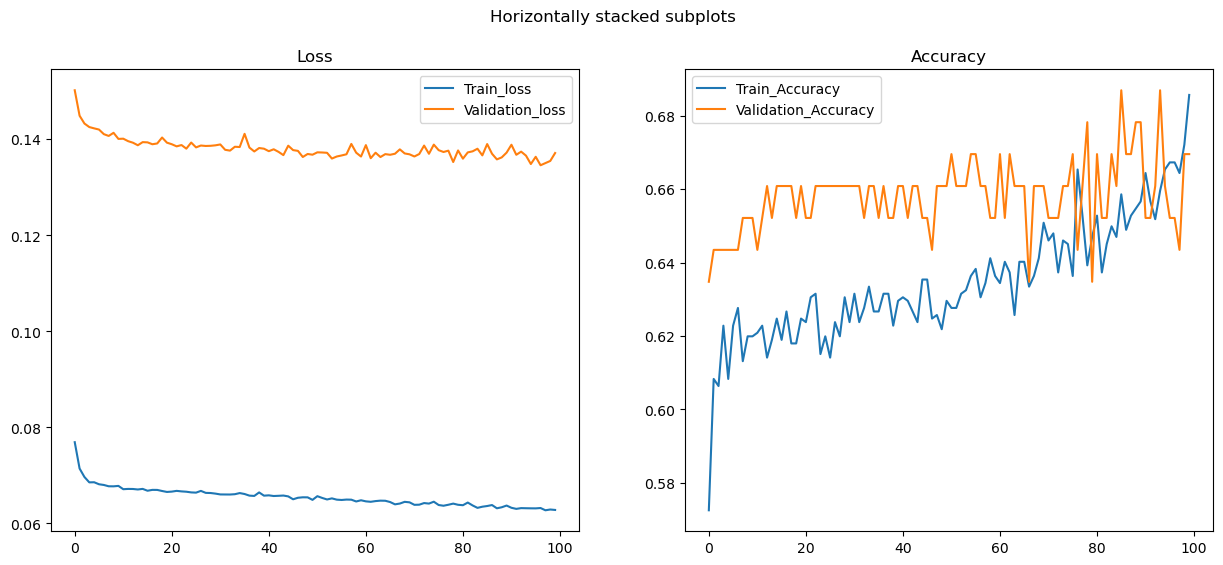

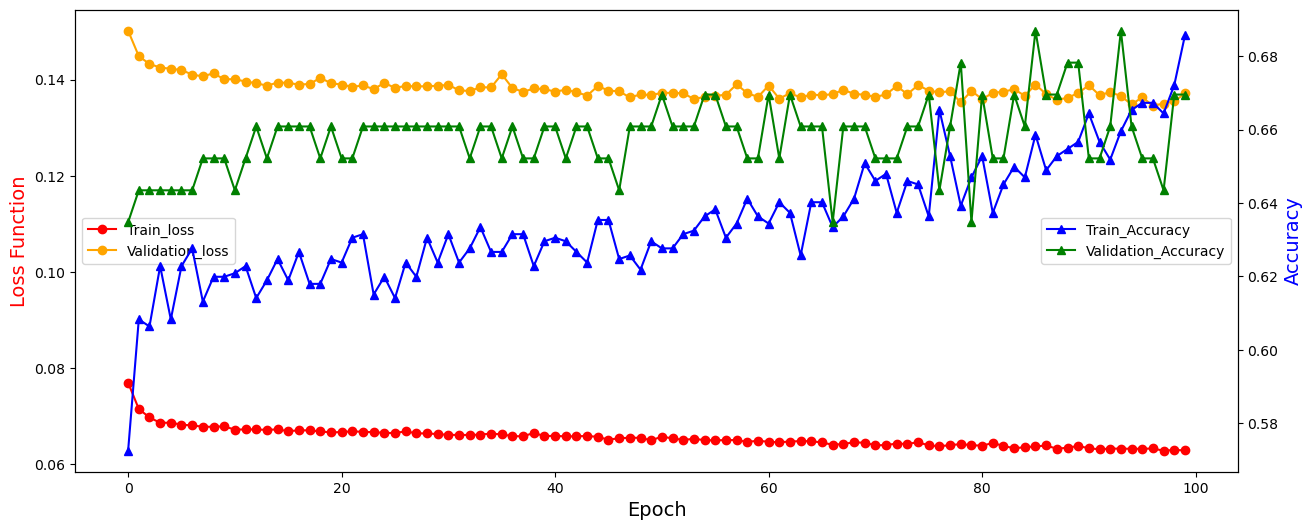

Current time: 41.348 minutes. Time expected till completion: 165.393 minutes

Epoch 101 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.06290321262477676
Val loss:  0.1359787448592808
train accuracy:  0.6982591876208898
Val accuracy:  0.6608695652173913
Current time: 41.750 minutes. Time expected till completion: 164.934 minutes

Epoch 102 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.06303499053940322
Val loss:  0.13609457948933476
train accuracy:  0.6644100580270793
Val accuracy:  0.6434782608695652
Current time: 42.155 minutes. Time expected till completion: 164.486 minutes

Epoch 103 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06316902069104709
Val loss:  0.13940559055494225
train accuracy:  0.6673114119922631
Val accuracy:  0.6347826086956522
Current time: 42.563 minutes. Time expected till completion: 164.053 minutes

Epoch 104 of 500


100%|██████████| 15/15 [00:01<00:00, 12.74it/s]


train loss:  0.062457121260161556
Val loss:  0.13594107109567394
train accuracy:  0.6740812379110251
Val accuracy:  0.6521739130434783
Current time: 42.972 minutes. Time expected till completion: 163.625 minutes

Epoch 105 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.06291368067610426
Val loss:  0.13940101602803107
train accuracy:  0.6721470019342359
Val accuracy:  0.6260869565217392
Current time: 43.381 minutes. Time expected till completion: 163.193 minutes

Epoch 106 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.06320412125532124
Val loss:  0.13730918842813242
train accuracy:  0.6663442940038685
Val accuracy:  0.6869565217391305
Current time: 43.791 minutes. Time expected till completion: 162.771 minutes

Epoch 107 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06304526588441786
Val loss:  0.13714215910953023
train accuracy:  0.6692456479690522
Val accuracy:  0.6434782608695652
Current time: 44.199 minutes. Time expected till completion: 162.337 minutes

Epoch 108 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.062036562357926504
Val loss:  0.13666473367939824
train accuracy:  0.6856866537717602
Val accuracy:  0.6521739130434783
Current time: 44.608 minutes. Time expected till completion: 161.910 minutes

Epoch 109 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06214184785258148
Val loss:  0.13775778646054476
train accuracy:  0.6789168278529981
Val accuracy:  0.6521739130434783
Current time: 45.017 minutes. Time expected till completion: 161.483 minutes

Epoch 110 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.062309452597361696
Val loss:  0.13792062842327615
train accuracy:  0.6818181818181818
Val accuracy:  0.6521739130434783
Current time: 45.425 minutes. Time expected till completion: 161.051 minutes

Epoch 111 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06259925343543003
Val loss:  0.13935217287229454
train accuracy:  0.6750483558994197
Val accuracy:  0.6521739130434783
Current time: 45.833 minutes. Time expected till completion: 160.622 minutes

Epoch 112 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.0623907246257627
Val loss:  0.136035824858624
train accuracy:  0.6711798839458414
Val accuracy:  0.6434782608695652
Current time: 46.241 minutes. Time expected till completion: 160.193 minutes

Epoch 113 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06220318910231673
Val loss:  0.13853698761566827
train accuracy:  0.690522243713733
Val accuracy:  0.6782608695652174
Current time: 46.651 minutes. Time expected till completion: 159.770 minutes

Epoch 114 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06269761602929298
Val loss:  0.13533474258754563
train accuracy:  0.6856866537717602
Val accuracy:  0.6521739130434783
Current time: 47.061 minutes. Time expected till completion: 159.345 minutes

Epoch 115 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.06244050292027988
Val loss:  0.13843048759128737
train accuracy:  0.6866537717601547
Val accuracy:  0.6173913043478261
Current time: 47.471 minutes. Time expected till completion: 158.924 minutes

Epoch 116 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.0624315978480031
Val loss:  0.13782694909883583
train accuracy:  0.6779497098646035
Val accuracy:  0.6782608695652174
Current time: 47.881 minutes. Time expected till completion: 158.502 minutes

Epoch 117 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.06165509130553535
Val loss:  0.13565906752710757
train accuracy:  0.688588007736944
Val accuracy:  0.6956521739130435
Current time: 48.290 minutes. Time expected till completion: 158.079 minutes

Epoch 118 of 500


100%|██████████| 15/15 [00:01<00:00, 12.74it/s]


train loss:  0.06184443681567504
Val loss:  0.13754962734554124
train accuracy:  0.695357833655706
Val accuracy:  0.6695652173913044
Current time: 48.701 minutes. Time expected till completion: 157.658 minutes

Epoch 119 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.06158353293195684
Val loss:  0.1389726680258046
train accuracy:  0.6972920696324951
Val accuracy:  0.6260869565217392
Current time: 49.111 minutes. Time expected till completion: 157.239 minutes

Epoch 120 of 500


100%|██████████| 15/15 [00:01<00:00, 13.29it/s]


train loss:  0.06224493708324617
Val loss:  0.13794606716736504
train accuracy:  0.6924564796905223
Val accuracy:  0.6782608695652174
Current time: 49.520 minutes. Time expected till completion: 156.813 minutes

Epoch 121 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.06148024332823099
Val loss:  0.1383583789286406
train accuracy:  0.6972920696324951
Val accuracy:  0.6695652173913044
Current time: 49.930 minutes. Time expected till completion: 156.391 minutes

Epoch 122 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.06160562723240954
Val loss:  0.13751589007999587
train accuracy:  0.6982591876208898
Val accuracy:  0.6521739130434783
Current time: 50.336 minutes. Time expected till completion: 155.959 minutes

Epoch 123 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.06177126104642621
Val loss:  0.134333612607873
train accuracy:  0.7059961315280464
Val accuracy:  0.6782608695652174
Current time: 50.745 minutes. Time expected till completion: 155.534 minutes

Epoch 124 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.06157033597938789
Val loss:  0.13612522353296694
train accuracy:  0.6982591876208898
Val accuracy:  0.6521739130434783
Current time: 51.151 minutes. Time expected till completion: 155.102 minutes

Epoch 125 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06179269560301096
Val loss:  0.13779045084248417
train accuracy:  0.7176015473887815
Val accuracy:  0.6782608695652174
Current time: 51.561 minutes. Time expected till completion: 154.683 minutes

Epoch 126 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.06110676581209356
Val loss:  0.1403188099031863
train accuracy:  0.7088974854932302
Val accuracy:  0.7130434782608696
Current time: 51.971 minutes. Time expected till completion: 154.263 minutes

Epoch 127 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.061706395225321994
Val loss:  0.13647052982579108
train accuracy:  0.7040618955512572
Val accuracy:  0.6608695652173913
Current time: 52.380 minutes. Time expected till completion: 153.841 minutes

Epoch 128 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.061612485455821056
Val loss:  0.1385485794233239
train accuracy:  0.6982591876208898
Val accuracy:  0.6434782608695652
Current time: 52.788 minutes. Time expected till completion: 153.414 minutes

Epoch 129 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.06224473284798849
Val loss:  0.13677722630293473
train accuracy:  0.7098646034816247
Val accuracy:  0.7043478260869566
Current time: 53.196 minutes. Time expected till completion: 152.991 minutes

Epoch 130 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.06149741995726609
Val loss:  0.1380756569945294
train accuracy:  0.706963249516441
Val accuracy:  0.6869565217391305
Current time: 53.605 minutes. Time expected till completion: 152.569 minutes

Epoch 131 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.06137056559381909
Val loss:  0.13753943598788718
train accuracy:  0.7088974854932302
Val accuracy:  0.6608695652173913
Current time: 54.014 minutes. Time expected till completion: 152.147 minutes

Epoch 132 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.06148697121692119
Val loss:  0.13826668573462444
train accuracy:  0.718568665377176
Val accuracy:  0.6695652173913044
Current time: 54.424 minutes. Time expected till completion: 151.728 minutes

Epoch 133 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.061239822113767585
Val loss:  0.13591096193894095
train accuracy:  0.7127659574468085
Val accuracy:  0.6434782608695652
Current time: 54.834 minutes. Time expected till completion: 151.309 minutes

Epoch 134 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.0617976938041082
Val loss:  0.1346763330957164
train accuracy:  0.7147001934235977
Val accuracy:  0.7043478260869566
Current time: 55.243 minutes. Time expected till completion: 150.889 minutes

Epoch 135 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.0612578960982236
Val loss:  0.1376622490260912
train accuracy:  0.7156673114119922
Val accuracy:  0.6695652173913044
Current time: 55.656 minutes. Time expected till completion: 150.477 minutes

Epoch 136 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.061350076583644636
Val loss:  0.1347813238268313
train accuracy:  0.6972920696324951
Val accuracy:  0.6782608695652174
Current time: 56.066 minutes. Time expected till completion: 150.059 minutes

Epoch 137 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06093693477042178
Val loss:  0.13631523121958194
train accuracy:  0.7205029013539652
Val accuracy:  0.6956521739130435
Current time: 56.476 minutes. Time expected till completion: 149.641 minutes

Epoch 138 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.061399938290077664
Val loss:  0.1382285071455914
train accuracy:  0.7137330754352031
Val accuracy:  0.6869565217391305
Current time: 56.888 minutes. Time expected till completion: 149.228 minutes

Epoch 139 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06124964759935493
Val loss:  0.13734097273453422
train accuracy:  0.7321083172147002
Val accuracy:  0.6608695652173913
Current time: 57.298 minutes. Time expected till completion: 148.810 minutes

Epoch 140 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06116366605463526
Val loss:  0.14077315278675245
train accuracy:  0.7311411992263056
Val accuracy:  0.6086956521739131
Current time: 57.709 minutes. Time expected till completion: 148.395 minutes

Epoch 141 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.06141006543050652
Val loss:  0.13866249737532244
train accuracy:  0.7214700193423598
Val accuracy:  0.7043478260869566
Current time: 58.119 minutes. Time expected till completion: 147.978 minutes

Epoch 142 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.06103692784530743
Val loss:  0.14025991844094318
train accuracy:  0.7117988394584139
Val accuracy:  0.6521739130434783
Current time: 58.531 minutes. Time expected till completion: 147.563 minutes

Epoch 143 of 500


100%|██████████| 15/15 [00:01<00:00, 12.93it/s]


train loss:  0.06118244232476565
Val loss:  0.13920356138892795
train accuracy:  0.7224371373307543
Val accuracy:  0.591304347826087
Current time: 58.941 minutes. Time expected till completion: 147.147 minutes

Epoch 144 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.060554185619206675
Val loss:  0.13631299889605977
train accuracy:  0.7379110251450677
Val accuracy:  0.6695652173913044
Current time: 59.351 minutes. Time expected till completion: 146.728 minutes

Epoch 145 of 500


100%|██████████| 15/15 [00:01<00:00, 12.76it/s]


train loss:  0.060738414756564614
Val loss:  0.13469313020291535
train accuracy:  0.7292069632495164
Val accuracy:  0.6695652173913044
Current time: 59.762 minutes. Time expected till completion: 146.313 minutes

Epoch 146 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.06119553096289791
Val loss:  0.13523551070171855
train accuracy:  0.7176015473887815
Val accuracy:  0.6695652173913044
Current time: 60.171 minutes. Time expected till completion: 145.895 minutes

Epoch 147 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.06082646349873718
Val loss:  0.13674446448035862
train accuracy:  0.7321083172147002
Val accuracy:  0.6782608695652174
Current time: 60.580 minutes. Time expected till completion: 145.473 minutes

Epoch 148 of 500


100%|██████████| 15/15 [00:01<00:00, 13.22it/s]


train loss:  0.06028971721632568
Val loss:  0.13983954294868137
train accuracy:  0.7156673114119922
Val accuracy:  0.6782608695652174
Current time: 60.989 minutes. Time expected till completion: 145.055 minutes

Epoch 149 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.06140475635141192
Val loss:  0.13651839805685956
train accuracy:  0.7340425531914894
Val accuracy:  0.6869565217391305
Current time: 61.400 minutes. Time expected till completion: 144.640 minutes

Epoch 150 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05997612968634821
Val loss:  0.13518569676772407
train accuracy:  0.7427466150870407
Val accuracy:  0.6869565217391305
Current time: 61.810 minutes. Time expected till completion: 144.223 minutes

Epoch 151 of 500


100%|██████████| 15/15 [00:01<00:00, 13.26it/s]


train loss:  0.060707048244586996
Val loss:  0.13585373733354653
train accuracy:  0.7292069632495164
Val accuracy:  0.6782608695652174
Current time: 62.219 minutes. Time expected till completion: 143.804 minutes

Epoch 152 of 500


100%|██████████| 15/15 [00:01<00:00, 13.29it/s]


train loss:  0.060369527086298516
Val loss:  0.13484881338865862
train accuracy:  0.7572533849129593
Val accuracy:  0.6869565217391305
Current time: 62.626 minutes. Time expected till completion: 143.382 minutes

Epoch 153 of 500


100%|██████████| 15/15 [00:01<00:00, 13.20it/s]


train loss:  0.060179800486887446
Val loss:  0.13640858867894048
train accuracy:  0.7485493230174082
Val accuracy:  0.6869565217391305
Current time: 63.038 minutes. Time expected till completion: 142.969 minutes

Epoch 154 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.06018321034525534
Val loss:  0.13844984925311546
train accuracy:  0.7553191489361702
Val accuracy:  0.6782608695652174
Current time: 63.449 minutes. Time expected till completion: 142.553 minutes

Epoch 155 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.06038188824801196
Val loss:  0.13656845870225326
train accuracy:  0.7504835589941973
Val accuracy:  0.6
Current time: 63.859 minutes. Time expected till completion: 142.139 minutes

Epoch 156 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.060279359842868564
Val loss:  0.13817617737728616
train accuracy:  0.7543520309477756
Val accuracy:  0.6782608695652174
Current time: 64.269 minutes. Time expected till completion: 141.722 minutes

Epoch 157 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.06028785471528826
Val loss:  0.13670938947926398
train accuracy:  0.7456479690522244
Val accuracy:  0.6521739130434783
Current time: 64.680 minutes. Time expected till completion: 141.307 minutes

Epoch 158 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.05954542392918865
Val loss:  0.14048414696817813
train accuracy:  0.7669245647969052
Val accuracy:  0.6260869565217392
Current time: 65.090 minutes. Time expected till completion: 140.891 minutes

Epoch 159 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.059695599388107805
Val loss:  0.14115146139393683
train accuracy:  0.7524177949709865
Val accuracy:  0.6
Current time: 65.500 minutes. Time expected till completion: 140.474 minutes

Epoch 160 of 500


100%|██████████| 15/15 [00:01<00:00, 12.90it/s]


train loss:  0.059698759875399
Val loss:  0.1465378242990245
train accuracy:  0.7504835589941973
Val accuracy:  0.5565217391304348
Current time: 65.909 minutes. Time expected till completion: 140.057 minutes

Epoch 161 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.059663384461080084
Val loss:  0.1375979340594748
train accuracy:  0.7640232108317214
Val accuracy:  0.6
Current time: 66.321 minutes. Time expected till completion: 139.645 minutes

Epoch 162 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.06051312747269119
Val loss:  0.13626099721245144
train accuracy:  0.741779497098646
Val accuracy:  0.6521739130434783
Current time: 66.731 minutes. Time expected till completion: 139.228 minutes

Epoch 163 of 500


100%|██████████| 15/15 [00:01<00:00, 13.23it/s]


train loss:  0.06007034716338669
Val loss:  0.13505781992622043
train accuracy:  0.7640232108317214
Val accuracy:  0.6956521739130435
Current time: 67.140 minutes. Time expected till completion: 138.811 minutes

Epoch 164 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.05940176780034772
Val loss:  0.13526206172030905
train accuracy:  0.7727272727272727
Val accuracy:  0.6521739130434783
Current time: 67.551 minutes. Time expected till completion: 138.397 minutes

Epoch 165 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.05977798730307898
Val loss:  0.13802107572555541
train accuracy:  0.7640232108317214
Val accuracy:  0.6521739130434783
Current time: 67.962 minutes. Time expected till completion: 137.984 minutes

Epoch 166 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.059462044467317295
Val loss:  0.13676247700400976
train accuracy:  0.7591876208897486
Val accuracy:  0.6347826086956522
Current time: 68.372 minutes. Time expected till completion: 137.568 minutes

Epoch 167 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.060126940678351164
Val loss:  0.13798217255136241
train accuracy:  0.7543520309477756
Val accuracy:  0.6434782608695652
Current time: 68.780 minutes. Time expected till completion: 137.148 minutes

Epoch 168 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.059773723783991095
Val loss:  0.1367677698964658
train accuracy:  0.7630560928433269
Val accuracy:  0.6782608695652174
Current time: 69.191 minutes. Time expected till completion: 136.735 minutes

Epoch 169 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.059548586030532126
Val loss:  0.13455616857694544
train accuracy:  0.7553191489361702
Val accuracy:  0.6956521739130435
Current time: 69.604 minutes. Time expected till completion: 136.326 minutes

Epoch 170 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05995445094671194
Val loss:  0.13902800756952036
train accuracy:  0.7678916827852998
Val accuracy:  0.6260869565217392
Current time: 70.014 minutes. Time expected till completion: 135.909 minutes

Epoch 171 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.05971907762309799
Val loss:  0.13681040069331293
train accuracy:  0.7572533849129593
Val accuracy:  0.6869565217391305
Current time: 70.422 minutes. Time expected till completion: 135.491 minutes

Epoch 172 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05935317306730687
Val loss:  0.13790642800538436
train accuracy:  0.7785299806576402
Val accuracy:  0.6173913043478261
Current time: 70.832 minutes. Time expected till completion: 135.075 minutes

Epoch 173 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.05935852751279938
Val loss:  0.1358943047730819
train accuracy:  0.7707930367504836
Val accuracy:  0.6782608695652174
Current time: 71.242 minutes. Time expected till completion: 134.659 minutes

Epoch 174 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.059546424872178864
Val loss:  0.1376530699107958
train accuracy:  0.7669245647969052
Val accuracy:  0.6434782608695652
Current time: 71.652 minutes. Time expected till completion: 134.244 minutes

Epoch 175 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.05912113345338021
Val loss:  0.13628351895705512
train accuracy:  0.7717601547388782
Val accuracy:  0.6956521739130435
Current time: 72.062 minutes. Time expected till completion: 133.829 minutes

Epoch 176 of 500


100%|██████████| 15/15 [00:01<00:00, 13.20it/s]


train loss:  0.059771435173152726
Val loss:  0.1370075116986814
train accuracy:  0.753384912959381
Val accuracy:  0.6608695652173913
Current time: 72.472 minutes. Time expected till completion: 133.414 minutes

Epoch 177 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05936031928376026
Val loss:  0.13608548848525337
train accuracy:  0.7553191489361702
Val accuracy:  0.6608695652173913
Current time: 72.881 minutes. Time expected till completion: 132.998 minutes

Epoch 178 of 500


100%|██████████| 15/15 [00:01<00:00, 13.20it/s]


train loss:  0.05893527337384178
Val loss:  0.13630206947741302
train accuracy:  0.781431334622824
Val accuracy:  0.6782608695652174
Current time: 73.288 minutes. Time expected till completion: 132.577 minutes

Epoch 179 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05917365776962192
Val loss:  0.14035435137541397
train accuracy:  0.7736943907156673
Val accuracy:  0.6173913043478261
Current time: 73.698 minutes. Time expected till completion: 132.162 minutes

Epoch 180 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.058579786891402315
Val loss:  0.13885082939396734
train accuracy:  0.7940038684719536
Val accuracy:  0.6434782608695652
Current time: 74.106 minutes. Time expected till completion: 131.744 minutes

Epoch 181 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.058847501614568774
Val loss:  0.1379249702329221
train accuracy:  0.7823984526112185
Val accuracy:  0.6434782608695652
Current time: 74.515 minutes. Time expected till completion: 131.327 minutes

Epoch 182 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.05843068806299619
Val loss:  0.13578938142113064
train accuracy:  0.793036750483559
Val accuracy:  0.6869565217391305
Current time: 74.922 minutes. Time expected till completion: 130.907 minutes

Epoch 183 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.058950722217559814
Val loss:  0.1345444829567619
train accuracy:  0.7940038684719536
Val accuracy:  0.6869565217391305
Current time: 75.330 minutes. Time expected till completion: 130.489 minutes

Epoch 184 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.058103782295950146
Val loss:  0.13635864724283633
train accuracy:  0.8056092843326886
Val accuracy:  0.6869565217391305
Current time: 75.739 minutes. Time expected till completion: 130.073 minutes

Epoch 185 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05857330958432801
Val loss:  0.13644021801326586
train accuracy:  0.7891682785299806
Val accuracy:  0.7043478260869566
Current time: 76.148 minutes. Time expected till completion: 129.657 minutes

Epoch 186 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.05868156920088098
Val loss:  0.13453863496365753
train accuracy:  0.7746615087040619
Val accuracy:  0.6869565217391305
Current time: 76.557 minutes. Time expected till completion: 129.241 minutes

Epoch 187 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.058317948298481956
Val loss:  0.13308255568794583
train accuracy:  0.7852998065764023
Val accuracy:  0.6956521739130435
Current time: 76.965 minutes. Time expected till completion: 128.824 minutes

Epoch 188 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.058289047020777515
Val loss:  0.1376642662545909
train accuracy:  0.7872340425531915
Val accuracy:  0.6782608695652174
Current time: 77.375 minutes. Time expected till completion: 128.410 minutes

Epoch 189 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.058543078788705676
Val loss:  0.13456372385439666
train accuracy:  0.7746615087040619
Val accuracy:  0.6521739130434783
Current time: 77.786 minutes. Time expected till completion: 127.996 minutes

Epoch 190 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.05813772154961149
Val loss:  0.13926971943482108
train accuracy:  0.8027079303675049
Val accuracy:  0.6608695652173913
Current time: 78.196 minutes. Time expected till completion: 127.583 minutes

Epoch 191 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05808853964741041
Val loss:  0.13506758679514347
train accuracy:  0.8017408123791102
Val accuracy:  0.7304347826086957
Current time: 78.605 minutes. Time expected till completion: 127.167 minutes

Epoch 192 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05871748762850144
Val loss:  0.13510298936263374
train accuracy:  0.7978723404255319
Val accuracy:  0.6869565217391305
Current time: 79.015 minutes. Time expected till completion: 126.753 minutes

Epoch 193 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.058895588555234545
Val loss:  0.13596871210181194
train accuracy:  0.793036750483559
Val accuracy:  0.6521739130434783
Current time: 79.421 minutes. Time expected till completion: 126.334 minutes

Epoch 194 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.058539043254501814
Val loss:  0.1391909754794577
train accuracy:  0.7969052224371374
Val accuracy:  0.6347826086956522
Current time: 79.830 minutes. Time expected till completion: 125.917 minutes

Epoch 195 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.058442612162411096
Val loss:  0.14394623041152954
train accuracy:  0.7901353965183753
Val accuracy:  0.5478260869565217
Current time: 80.239 minutes. Time expected till completion: 125.502 minutes

Epoch 196 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.05818836774309553
Val loss:  0.14884850253229556
train accuracy:  0.7920696324951644
Val accuracy:  0.5826086956521739
Current time: 80.647 minutes. Time expected till completion: 125.085 minutes

Epoch 197 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05776718489436624
Val loss:  0.13434417144111965
train accuracy:  0.8075435203094777
Val accuracy:  0.6260869565217392
Current time: 81.055 minutes. Time expected till completion: 124.669 minutes

Epoch 198 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.058385693300623494
Val loss:  0.13338176530340443
train accuracy:  0.7882011605415861
Val accuracy:  0.6782608695652174
Current time: 81.465 minutes. Time expected till completion: 124.255 minutes

Epoch 199 of 500


100%|██████████| 15/15 [00:01<00:00, 12.84it/s]


train loss:  0.05816526097070779
Val loss:  0.1390327292939891
train accuracy:  0.8056092843326886
Val accuracy:  0.6347826086956522
Current time: 81.874 minutes. Time expected till completion: 123.840 minutes

Epoch 200 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.05857000262179273
Val loss:  0.13775645805441816
train accuracy:  0.7862669245647969
Val accuracy:  0.6434782608695652
Saving model checkpoint


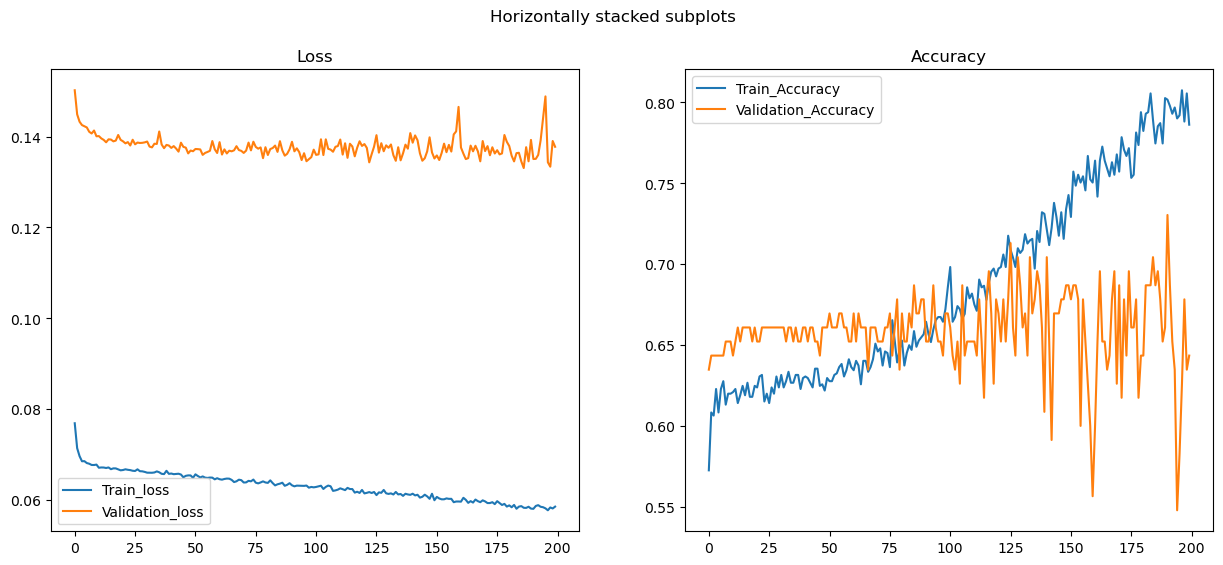

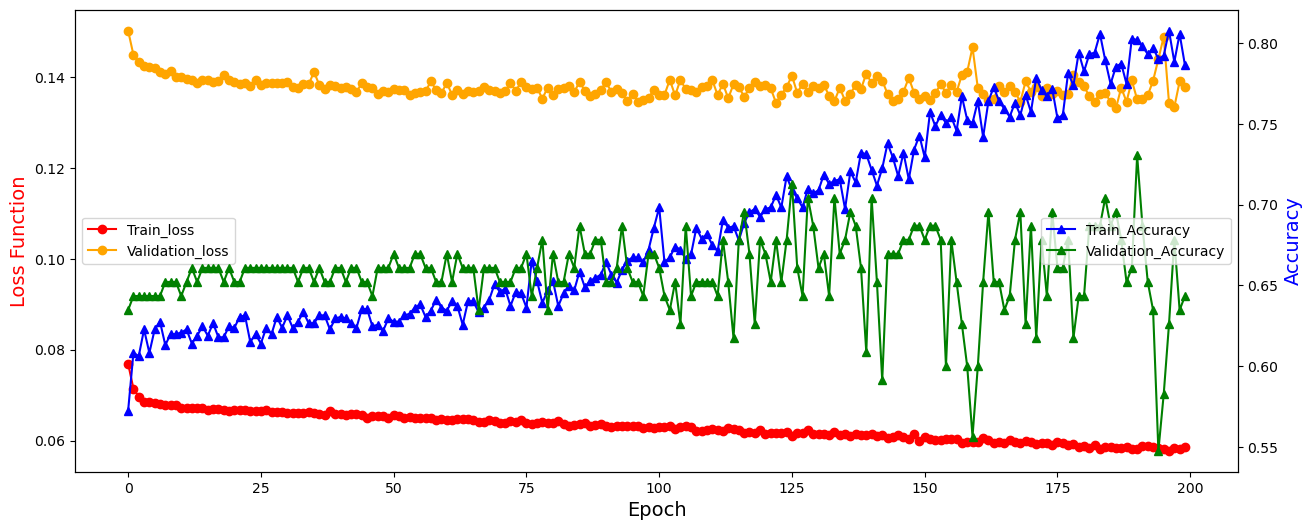

Current time: 82.299 minutes. Time expected till completion: 123.448 minutes

Epoch 201 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.05818818639279334
Val loss:  0.1389598037885583
train accuracy:  0.7978723404255319
Val accuracy:  0.6434782608695652
Current time: 82.706 minutes. Time expected till completion: 123.030 minutes

Epoch 202 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05792204848341139
Val loss:  0.13467869654945705
train accuracy:  0.8056092843326886
Val accuracy:  0.6782608695652174
Current time: 83.113 minutes. Time expected till completion: 122.613 minutes

Epoch 203 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.058151761383337025
Val loss:  0.1358552829079006
train accuracy:  0.7949709864603481
Val accuracy:  0.6695652173913044
Current time: 83.521 minutes. Time expected till completion: 122.195 minutes

Epoch 204 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.056968883631077216
Val loss:  0.13990517958350804
train accuracy:  0.809477756286267
Val accuracy:  0.6086956521739131
Current time: 83.927 minutes. Time expected till completion: 121.777 minutes

Epoch 205 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.05734577515600267
Val loss:  0.13529996560967486
train accuracy:  0.8143133462282398
Val accuracy:  0.6869565217391305
Current time: 84.336 minutes. Time expected till completion: 121.361 minutes

Epoch 206 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05750008598978792
Val loss:  0.13616887279178785
train accuracy:  0.8172147001934236
Val accuracy:  0.6782608695652174
Current time: 84.743 minutes. Time expected till completion: 120.944 minutes

Epoch 207 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05742689390708215
Val loss:  0.13741172655769016
train accuracy:  0.8181818181818182
Val accuracy:  0.6695652173913044
Current time: 85.152 minutes. Time expected till completion: 120.529 minutes

Epoch 208 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05746407412006961
Val loss:  0.13901941620785258
train accuracy:  0.8172147001934236
Val accuracy:  0.6608695652173913
Current time: 85.561 minutes. Time expected till completion: 120.114 minutes

Epoch 209 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.057749013720905296
Val loss:  0.13826177016548488
train accuracy:  0.8007736943907157
Val accuracy:  0.6434782608695652
Current time: 85.969 minutes. Time expected till completion: 119.699 minutes

Epoch 210 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.05679559021669384
Val loss:  0.1447012802828913
train accuracy:  0.8239845261121856
Val accuracy:  0.5739130434782609
Current time: 86.376 minutes. Time expected till completion: 119.281 minutes

Epoch 211 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05716046892697391
Val loss:  0.13309459116147912
train accuracy:  0.8123791102514507
Val accuracy:  0.6695652173913044
Current time: 86.785 minutes. Time expected till completion: 118.867 minutes

Epoch 212 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.0572497687325948
Val loss:  0.13220769633417545
train accuracy:  0.8191489361702128
Val accuracy:  0.6782608695652174
Current time: 87.193 minutes. Time expected till completion: 118.450 minutes

Epoch 213 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.056996047842664
Val loss:  0.13485709117806477
train accuracy:  0.8133462282398453
Val accuracy:  0.6695652173913044
Current time: 87.603 minutes. Time expected till completion: 118.037 minutes

Epoch 214 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.05736425363348808
Val loss:  0.13944271336431088
train accuracy:  0.816247582205029
Val accuracy:  0.6521739130434783
Current time: 88.012 minutes. Time expected till completion: 117.623 minutes

Epoch 215 of 500


100%|██████████| 15/15 [00:01<00:00, 13.00it/s]


train loss:  0.05687587300398363
Val loss:  0.13431375337683638
train accuracy:  0.8220502901353965
Val accuracy:  0.6956521739130435
Current time: 88.421 minutes. Time expected till completion: 117.209 minutes

Epoch 216 of 500


100%|██████████| 15/15 [00:01<00:00, 12.80it/s]


train loss:  0.05708641246162946
Val loss:  0.13888050421424533
train accuracy:  0.8230174081237911
Val accuracy:  0.6695652173913044
Current time: 88.829 minutes. Time expected till completion: 116.794 minutes

Epoch 217 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05608929281539105
Val loss:  0.1367290921833204
train accuracy:  0.8423597678916828
Val accuracy:  0.6434782608695652
Current time: 89.235 minutes. Time expected till completion: 116.376 minutes

Epoch 218 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.057364624289064386
Val loss:  0.13487259305041768
train accuracy:  0.7998065764023211
Val accuracy:  0.6608695652173913
Current time: 89.642 minutes. Time expected till completion: 115.959 minutes

Epoch 219 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05672162776989448
Val loss:  0.13515970862430074
train accuracy:  0.8249516441005803
Val accuracy:  0.6869565217391305
Current time: 90.050 minutes. Time expected till completion: 115.543 minutes

Epoch 220 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.05697739712274282
Val loss:  0.1391779749289803
train accuracy:  0.8259187620889749
Val accuracy:  0.6608695652173913
Current time: 90.457 minutes. Time expected till completion: 115.127 minutes

Epoch 221 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05652022517396126
Val loss:  0.13644052381100863
train accuracy:  0.8220502901353965
Val accuracy:  0.6782608695652174
Current time: 90.866 minutes. Time expected till completion: 114.713 minutes

Epoch 222 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.057171043563396376
Val loss:  0.14163786691168082
train accuracy:  0.8201160541586073
Val accuracy:  0.591304347826087
Current time: 91.274 minutes. Time expected till completion: 114.298 minutes

Epoch 223 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.057083257162363434
Val loss:  0.13481964391210804
train accuracy:  0.8230174081237911
Val accuracy:  0.6869565217391305
Current time: 91.683 minutes. Time expected till completion: 113.884 minutes

Epoch 224 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05628206011635653
Val loss:  0.13805224895477294
train accuracy:  0.8384912959381045
Val accuracy:  0.6782608695652174
Current time: 92.091 minutes. Time expected till completion: 113.469 minutes

Epoch 225 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05668210256952843
Val loss:  0.13833609404771224
train accuracy:  0.8259187620889749
Val accuracy:  0.6782608695652174
Current time: 92.498 minutes. Time expected till completion: 113.053 minutes

Epoch 226 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05573169636311338
Val loss:  0.14522110534750898
train accuracy:  0.8423597678916828
Val accuracy:  0.591304347826087
Current time: 92.907 minutes. Time expected till completion: 112.640 minutes

Epoch 227 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05634519365585519
Val loss:  0.13956005832423335
train accuracy:  0.8307543520309478
Val accuracy:  0.6086956521739131
Current time: 93.317 minutes. Time expected till completion: 112.227 minutes

Epoch 228 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.05602748389400873
Val loss:  0.13577737860057665
train accuracy:  0.8365570599613152
Val accuracy:  0.6869565217391305
Current time: 93.725 minutes. Time expected till completion: 111.812 minutes

Epoch 229 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.056597740438044414
Val loss:  0.13475171794062074
train accuracy:  0.8239845261121856
Val accuracy:  0.6434782608695652
Current time: 94.132 minutes. Time expected till completion: 111.396 minutes

Epoch 230 of 500


100%|██████████| 15/15 [00:01<00:00, 13.25it/s]


train loss:  0.05680578508967357
Val loss:  0.1381813987441685
train accuracy:  0.8230174081237911
Val accuracy:  0.6521739130434783
Current time: 94.540 minutes. Time expected till completion: 110.982 minutes

Epoch 231 of 500


100%|██████████| 15/15 [00:01<00:00, 12.72it/s]


train loss:  0.055791205951738636
Val loss:  0.14230677666871444
train accuracy:  0.8568665377176016
Val accuracy:  0.6347826086956522
Current time: 94.949 minutes. Time expected till completion: 110.568 minutes

Epoch 232 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05630021837739926
Val loss:  0.13832867715669714
train accuracy:  0.8423597678916828
Val accuracy:  0.6
Current time: 95.357 minutes. Time expected till completion: 110.153 minutes

Epoch 233 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.05566362993398995
Val loss:  0.1414996598077857
train accuracy:  0.8423597678916828
Val accuracy:  0.6173913043478261
Current time: 95.764 minutes. Time expected till completion: 109.738 minutes

Epoch 234 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05563065876582605
Val loss:  0.14554343793703162
train accuracy:  0.8481624758220503
Val accuracy:  0.6
Current time: 96.171 minutes. Time expected till completion: 109.323 minutes

Epoch 235 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.056526615610436266
Val loss:  0.13924725107524705
train accuracy:  0.8326885880077369
Val accuracy:  0.6521739130434783
Current time: 96.580 minutes. Time expected till completion: 108.910 minutes

Epoch 236 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.055510566416745954
Val loss:  0.1419849976249363
train accuracy:  0.8500967117988395
Val accuracy:  0.591304347826087
Current time: 96.988 minutes. Time expected till completion: 108.495 minutes

Epoch 237 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.056529779671700364
Val loss:  0.13540928519290427
train accuracy:  0.8230174081237911
Val accuracy:  0.6521739130434783
Current time: 97.395 minutes. Time expected till completion: 108.080 minutes

Epoch 238 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05599594963588383
Val loss:  0.13926672106203825
train accuracy:  0.8491295938104448
Val accuracy:  0.6434782608695652
Current time: 97.802 minutes. Time expected till completion: 107.665 minutes

Epoch 239 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05553236730555271
Val loss:  0.1357348198476045
train accuracy:  0.8413926499032882
Val accuracy:  0.6173913043478261
Current time: 98.209 minutes. Time expected till completion: 107.249 minutes

Epoch 240 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.05594964443599693
Val loss:  0.13398788649102916
train accuracy:  0.8452611218568665
Val accuracy:  0.6608695652173913
Current time: 98.615 minutes. Time expected till completion: 106.833 minutes

Epoch 241 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05577624887516236
Val loss:  0.1408899680427883
train accuracy:  0.8481624758220503
Val accuracy:  0.6434782608695652
Current time: 99.024 minutes. Time expected till completion: 106.420 minutes

Epoch 242 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05573578481517401
Val loss:  0.13451637340628583
train accuracy:  0.8471953578336557
Val accuracy:  0.6869565217391305
Current time: 99.432 minutes. Time expected till completion: 106.006 minutes

Epoch 243 of 500


100%|██████████| 15/15 [00:01<00:00, 13.23it/s]


train loss:  0.055629801415843706
Val loss:  0.13986875959064649
train accuracy:  0.8481624758220503
Val accuracy:  0.6521739130434783
Current time: 99.840 minutes. Time expected till completion: 105.592 minutes

Epoch 244 of 500


100%|██████████| 15/15 [00:01<00:00, 13.00it/s]


train loss:  0.05542579598768076
Val loss:  0.13964237544847571
train accuracy:  0.8481624758220503
Val accuracy:  0.6521739130434783
Current time: 100.247 minutes. Time expected till completion: 105.178 minutes

Epoch 245 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05474333998313033
Val loss:  0.14650938148083895
train accuracy:  0.8665377176015474
Val accuracy:  0.6
Current time: 100.654 minutes. Time expected till completion: 104.763 minutes

Epoch 246 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05583481159154866
Val loss:  0.13643462606098342
train accuracy:  0.8413926499032882
Val accuracy:  0.7043478260869566
Current time: 101.063 minutes. Time expected till completion: 104.349 minutes

Epoch 247 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05574541765209323
Val loss:  0.14030667180600373
train accuracy:  0.851063829787234
Val accuracy:  0.6173913043478261
Current time: 101.471 minutes. Time expected till completion: 103.935 minutes

Epoch 248 of 500


100%|██████████| 15/15 [00:01<00:00, 12.76it/s]


train loss:  0.05531221685833811
Val loss:  0.1391113623328831
train accuracy:  0.8520309477756286
Val accuracy:  0.6260869565217392
Current time: 101.877 minutes. Time expected till completion: 103.521 minutes

Epoch 249 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.05539969808820138
Val loss:  0.1329190414884816
train accuracy:  0.8481624758220503
Val accuracy:  0.7217391304347827
Current time: 102.284 minutes. Time expected till completion: 103.105 minutes

Epoch 250 of 500


100%|██████████| 15/15 [00:01<00:00, 12.90it/s]


train loss:  0.05578387659799661
Val loss:  0.13798062956851462
train accuracy:  0.8558994197292069
Val accuracy:  0.6434782608695652
Current time: 102.692 minutes. Time expected till completion: 102.692 minutes

Epoch 251 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.05496063084851381
Val loss:  0.14540100926938265
train accuracy:  0.8597678916827853
Val accuracy:  0.5478260869565217
Current time: 103.098 minutes. Time expected till completion: 102.277 minutes

Epoch 252 of 500


100%|██████████| 15/15 [00:01<00:00, 12.90it/s]


train loss:  0.054819916099367566
Val loss:  0.14055288770924443
train accuracy:  0.8665377176015474
Val accuracy:  0.5826086956521739
Current time: 103.504 minutes. Time expected till completion: 101.862 minutes

Epoch 253 of 500


100%|██████████| 15/15 [00:01<00:00, 13.00it/s]


train loss:  0.05486132979854163
Val loss:  0.13855655089668606
train accuracy:  0.8597678916827853
Val accuracy:  0.6521739130434783
Current time: 103.912 minutes. Time expected till completion: 101.448 minutes

Epoch 254 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.05452023933657825
Val loss:  0.13510957489842954
train accuracy:  0.8733075435203095
Val accuracy:  0.6869565217391305
Current time: 104.320 minutes. Time expected till completion: 101.035 minutes

Epoch 255 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05484435025681841
Val loss:  0.1378606309061465
train accuracy:  0.8607350096711799
Val accuracy:  0.6434782608695652
Current time: 104.727 minutes. Time expected till completion: 100.620 minutes

Epoch 256 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.055040272511181564
Val loss:  0.14203378480413686
train accuracy:  0.867504835589942
Val accuracy:  0.6434782608695652
Current time: 105.136 minutes. Time expected till completion: 100.208 minutes

Epoch 257 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05556600559610924
Val loss:  0.13729646516882854
train accuracy:  0.8433268858800773
Val accuracy:  0.6608695652173913
Current time: 105.546 minutes. Time expected till completion: 99.796 minutes

Epoch 258 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.054879119248639224
Val loss:  0.13587912113770195
train accuracy:  0.8607350096711799
Val accuracy:  0.6869565217391305
Current time: 105.956 minutes. Time expected till completion: 99.385 minutes

Epoch 259 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05515957172650202
Val loss:  0.14681027661199156
train accuracy:  0.8558994197292069
Val accuracy:  0.5826086956521739
Current time: 106.364 minutes. Time expected till completion: 98.972 minutes

Epoch 260 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.054953275958158986
Val loss:  0.15183902253275333
train accuracy:  0.8617021276595744
Val accuracy:  0.5217391304347826
Current time: 106.771 minutes. Time expected till completion: 98.558 minutes

Epoch 261 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.0546508554794341
Val loss:  0.1391683340072632
train accuracy:  0.8713733075435203
Val accuracy:  0.6260869565217392
Current time: 107.181 minutes. Time expected till completion: 98.146 minutes

Epoch 262 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.054336383448809214
Val loss:  0.14639798765597137
train accuracy:  0.8568665377176016
Val accuracy:  0.6
Current time: 107.591 minutes. Time expected till completion: 97.735 minutes

Epoch 263 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.054089564880503906
Val loss:  0.1431384045144786
train accuracy:  0.879110251450677
Val accuracy:  0.591304347826087
Current time: 108.001 minutes. Time expected till completion: 97.324 minutes

Epoch 264 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.054455195047408055
Val loss:  0.1465996353522591
train accuracy:  0.8646034816247582
Val accuracy:  0.591304347826087
Current time: 108.409 minutes. Time expected till completion: 96.911 minutes

Epoch 265 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.05463676192082566
Val loss:  0.1466872821683469
train accuracy:  0.8694390715667312
Val accuracy:  0.5652173913043478
Current time: 108.818 minutes. Time expected till completion: 96.499 minutes

Epoch 266 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.054722106952501216
Val loss:  0.1383789720742599
train accuracy:  0.8636363636363636
Val accuracy:  0.6695652173913044
Current time: 109.225 minutes. Time expected till completion: 96.085 minutes

Epoch 267 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.05433719964045851
Val loss:  0.15051886776219245
train accuracy:  0.8752417794970987
Val accuracy:  0.6
Current time: 109.633 minutes. Time expected till completion: 95.673 minutes

Epoch 268 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05420665791694154
Val loss:  0.14016590325728706
train accuracy:  0.8762088974854932
Val accuracy:  0.6260869565217392
Current time: 110.041 minutes. Time expected till completion: 95.260 minutes

Epoch 269 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.05398381719045067
Val loss:  0.13843099604482237
train accuracy:  0.8878143133462283
Val accuracy:  0.6347826086956522
Current time: 110.449 minutes. Time expected till completion: 94.847 minutes

Epoch 270 of 500


100%|██████████| 15/15 [00:01<00:00, 13.24it/s]


train loss:  0.05512945846847224
Val loss:  0.14371796690899394
train accuracy:  0.851063829787234
Val accuracy:  0.591304347826087
Current time: 110.858 minutes. Time expected till completion: 94.435 minutes

Epoch 271 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.0541703366679887
Val loss:  0.1416756386342256
train accuracy:  0.8704061895551257
Val accuracy:  0.6173913043478261
Current time: 111.266 minutes. Time expected till completion: 94.022 minutes

Epoch 272 of 500


100%|██████████| 15/15 [00:01<00:00, 12.32it/s]


train loss:  0.053927509535673275
Val loss:  0.13565763235092163
train accuracy:  0.8810444874274661
Val accuracy:  0.6782608695652174
Current time: 111.672 minutes. Time expected till completion: 93.608 minutes

Epoch 273 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05369688181397532
Val loss:  0.14064753366553265
train accuracy:  0.8810444874274661
Val accuracy:  0.6347826086956522
Current time: 112.080 minutes. Time expected till completion: 93.195 minutes

Epoch 274 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05370044817776929
Val loss:  0.13950767620750096
train accuracy:  0.8907156673114119
Val accuracy:  0.6521739130434783
Current time: 112.487 minutes. Time expected till completion: 92.781 minutes

Epoch 275 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.05405610678735508
Val loss:  0.13643591870432314
train accuracy:  0.879110251450677
Val accuracy:  0.6782608695652174
Current time: 112.894 minutes. Time expected till completion: 92.367 minutes

Epoch 276 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05360905707920082
Val loss:  0.1401950390442558
train accuracy:  0.8849129593810445
Val accuracy:  0.6521739130434783
Current time: 113.299 minutes. Time expected till completion: 91.953 minutes

Epoch 277 of 500


100%|██████████| 15/15 [00:01<00:00, 13.26it/s]


train loss:  0.05403395680209885
Val loss:  0.13852621265079665
train accuracy:  0.879110251450677
Val accuracy:  0.6434782608695652
Current time: 113.705 minutes. Time expected till completion: 91.539 minutes

Epoch 278 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.05329986276894058
Val loss:  0.144930841093478
train accuracy:  0.8936170212765957
Val accuracy:  0.6086956521739131
Current time: 114.111 minutes. Time expected till completion: 91.124 minutes

Epoch 279 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05381618713963654
Val loss:  0.13873076594394187
train accuracy:  0.8733075435203095
Val accuracy:  0.6608695652173913
Current time: 114.518 minutes. Time expected till completion: 90.712 minutes

Epoch 280 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05475119332741492
Val loss:  0.13666042400443035
train accuracy:  0.8588007736943907
Val accuracy:  0.6695652173913044
Current time: 114.925 minutes. Time expected till completion: 90.299 minutes

Epoch 281 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.05394560726975565
Val loss:  0.14318482720333597
train accuracy:  0.8868471953578336
Val accuracy:  0.6
Current time: 115.334 minutes. Time expected till completion: 89.886 minutes

Epoch 282 of 500


100%|██████████| 15/15 [00:01<00:00, 12.69it/s]


train loss:  0.053950796101955655
Val loss:  0.1445103707520858
train accuracy:  0.8839458413926499
Val accuracy:  0.591304347826087
Current time: 115.740 minutes. Time expected till completion: 89.473 minutes

Epoch 283 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05307243110132863
Val loss:  0.13602660324262536
train accuracy:  0.8965183752417795
Val accuracy:  0.6695652173913044
Current time: 116.150 minutes. Time expected till completion: 89.062 minutes

Epoch 284 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.05334921576068295
Val loss:  0.13847022263900094
train accuracy:  0.8849129593810445
Val accuracy:  0.6347826086956522
Current time: 116.555 minutes. Time expected till completion: 88.648 minutes

Epoch 285 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05391570764307358
Val loss:  0.13963076550027598
train accuracy:  0.8858800773694391
Val accuracy:  0.6347826086956522
Current time: 116.962 minutes. Time expected till completion: 88.235 minutes

Epoch 286 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.05342103163324426
Val loss:  0.1396713526352592
train accuracy:  0.8897485493230174
Val accuracy:  0.6086956521739131
Current time: 117.367 minutes. Time expected till completion: 87.820 minutes

Epoch 287 of 500


100%|██████████| 15/15 [00:01<00:00, 13.25it/s]


train loss:  0.05353629571787393
Val loss:  0.15101874859436698
train accuracy:  0.8916827852998066
Val accuracy:  0.5739130434782609
Current time: 117.774 minutes. Time expected till completion: 87.407 minutes

Epoch 288 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.05333525772482099
Val loss:  0.1335671253826307
train accuracy:  0.8897485493230174
Val accuracy:  0.6869565217391305
Current time: 118.182 minutes. Time expected till completion: 86.995 minutes

Epoch 289 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.053471334148882894
Val loss:  0.14084440832552703
train accuracy:  0.8800773694390716
Val accuracy:  0.6086956521739131
Current time: 118.589 minutes. Time expected till completion: 86.582 minutes

Epoch 290 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05347548837357379
Val loss:  0.13568080197209897
train accuracy:  0.8907156673114119
Val accuracy:  0.6782608695652174
Current time: 118.997 minutes. Time expected till completion: 86.170 minutes

Epoch 291 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.053555946977272256
Val loss:  0.1352743060692497
train accuracy:  0.8762088974854932
Val accuracy:  0.6608695652173913
Current time: 119.407 minutes. Time expected till completion: 85.760 minutes

Epoch 292 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.053408332731092
Val loss:  0.1389853871386984
train accuracy:  0.8858800773694391
Val accuracy:  0.6347826086956522
Current time: 119.814 minutes. Time expected till completion: 85.347 minutes

Epoch 293 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05321064136014455
Val loss:  0.13807112185851386
train accuracy:  0.8868471953578336
Val accuracy:  0.6521739130434783
Current time: 120.221 minutes. Time expected till completion: 84.934 minutes

Epoch 294 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.05303890026053792
Val loss:  0.13799391518468443
train accuracy:  0.8974854932301741
Val accuracy:  0.6521739130434783
Current time: 120.630 minutes. Time expected till completion: 84.523 minutes

Epoch 295 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.053081170502668196
Val loss:  0.14700855638669885
train accuracy:  0.9032882011605415
Val accuracy:  0.591304347826087
Current time: 121.036 minutes. Time expected till completion: 84.110 minutes

Epoch 296 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.054088022019461925
Val loss:  0.15374498159989067
train accuracy:  0.879110251450677
Val accuracy:  0.5478260869565217
Current time: 121.442 minutes. Time expected till completion: 83.696 minutes

Epoch 297 of 500


100%|██████████| 15/15 [00:01<00:00, 13.29it/s]


train loss:  0.05412677345469565
Val loss:  0.13782737255096436
train accuracy:  0.8810444874274661
Val accuracy:  0.6608695652173913
Current time: 121.846 minutes. Time expected till completion: 83.282 minutes

Epoch 298 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.05295640114889385
Val loss:  0.14496226258899855
train accuracy:  0.8907156673114119
Val accuracy:  0.6347826086956522
Current time: 122.253 minutes. Time expected till completion: 82.869 minutes

Epoch 299 of 500


100%|██████████| 15/15 [00:01<00:00, 13.36it/s]


train loss:  0.05309934594183872
Val loss:  0.1478470838588217
train accuracy:  0.8926499032882012
Val accuracy:  0.5739130434782609
Current time: 122.658 minutes. Time expected till completion: 82.455 minutes

Epoch 300 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.053500412165311595
Val loss:  0.13835387489070064
train accuracy:  0.8839458413926499
Val accuracy:  0.6608695652173913
Saving model checkpoint


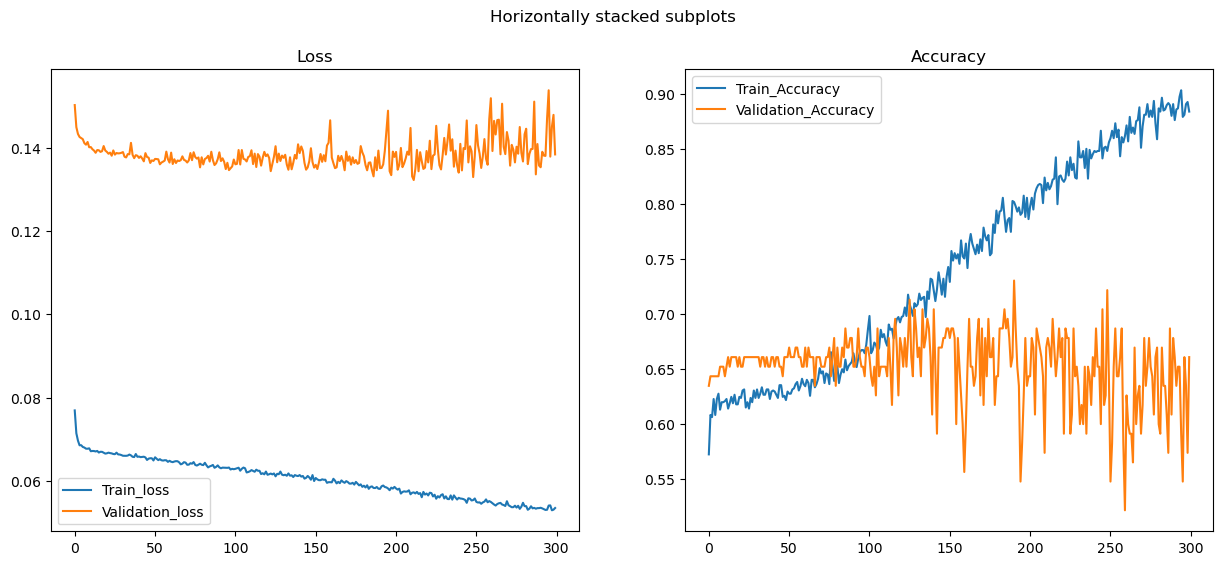

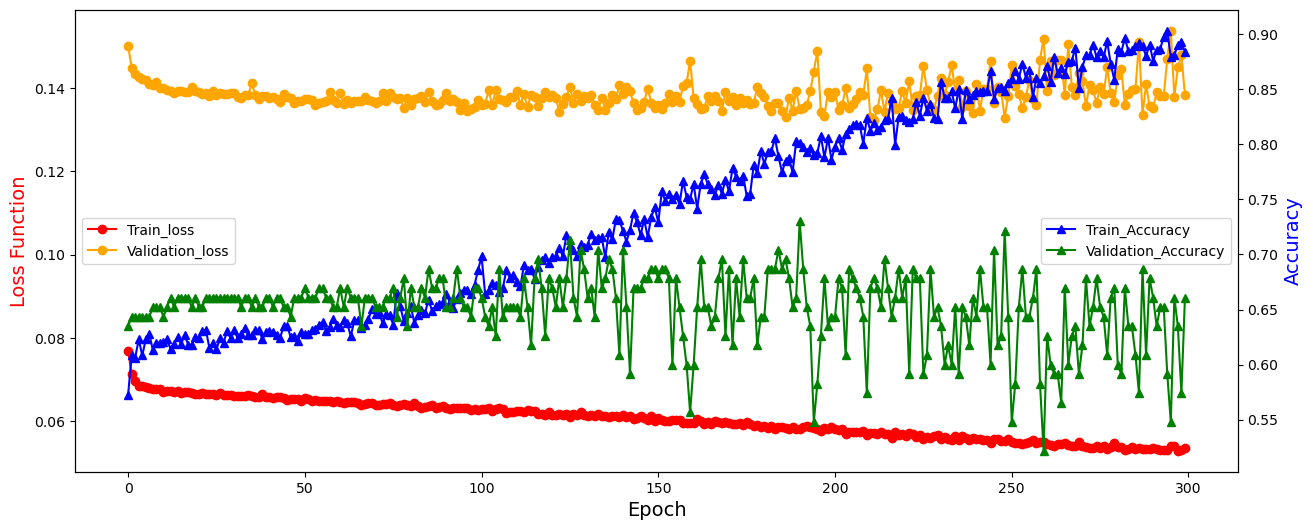

Current time: 123.087 minutes. Time expected till completion: 82.058 minutes

Epoch 301 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.05310014357188684
Val loss:  0.14343679780545443
train accuracy:  0.8945841392649904
Val accuracy:  0.6260869565217392
Current time: 123.500 minutes. Time expected till completion: 81.649 minutes

Epoch 302 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.05276213410514005
Val loss:  0.14261310204215671
train accuracy:  0.902321083172147
Val accuracy:  0.6434782608695652
Current time: 123.907 minutes. Time expected till completion: 81.237 minutes

Epoch 303 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.05294843510917353
Val loss:  0.14201574170071146
train accuracy:  0.8955512572533849
Val accuracy:  0.6521739130434783
Current time: 124.314 minutes. Time expected till completion: 80.825 minutes

Epoch 304 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.0533244725122212
Val loss:  0.1371244420175967
train accuracy:  0.8829787234042553
Val accuracy:  0.6608695652173913
Current time: 124.722 minutes. Time expected till completion: 80.413 minutes

Epoch 305 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.053240833072643906
Val loss:  0.14299241667208465
train accuracy:  0.8926499032882012
Val accuracy:  0.5826086956521739
Current time: 125.130 minutes. Time expected till completion: 80.001 minutes

Epoch 306 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.053648512010648124
Val loss:  0.1489898355110832
train accuracy:  0.8800773694390716
Val accuracy:  0.591304347826087
Current time: 125.537 minutes. Time expected till completion: 79.589 minutes

Epoch 307 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05399931030531686
Val loss:  0.15149817777716595
train accuracy:  0.879110251450677
Val accuracy:  0.5565217391304348
Current time: 125.945 minutes. Time expected till completion: 79.177 minutes

Epoch 308 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.05305707777491852
Val loss:  0.13593060762985892
train accuracy:  0.8965183752417795
Val accuracy:  0.7304347826086957
Current time: 126.350 minutes. Time expected till completion: 78.764 minutes

Epoch 309 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.052183089161749276
Val loss:  0.14065402072408925
train accuracy:  0.9061895551257253
Val accuracy:  0.6347826086956522
Current time: 126.756 minutes. Time expected till completion: 78.351 minutes

Epoch 310 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05271781891642041
Val loss:  0.14011115561360898
train accuracy:  0.9003868471953579
Val accuracy:  0.6434782608695652
Current time: 127.162 minutes. Time expected till completion: 77.938 minutes

Epoch 311 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.052763071408354796
Val loss:  0.14444834460382877
train accuracy:  0.9013539651837524
Val accuracy:  0.6173913043478261
Current time: 127.570 minutes. Time expected till completion: 77.527 minutes

Epoch 312 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.052418982383130364
Val loss:  0.14332829195520153
train accuracy:  0.9042553191489362
Val accuracy:  0.6347826086956522
Current time: 127.974 minutes. Time expected till completion: 77.113 minutes

Epoch 313 of 500


100%|██████████| 15/15 [00:01<00:00, 12.93it/s]


train loss:  0.05270464876864819
Val loss:  0.13899027316466622
train accuracy:  0.8907156673114119
Val accuracy:  0.6260869565217392
Current time: 128.380 minutes. Time expected till completion: 76.700 minutes

Epoch 314 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.05278747236244453
Val loss:  0.13718841231387593
train accuracy:  0.8955512572533849
Val accuracy:  0.6956521739130435
Current time: 128.786 minutes. Time expected till completion: 76.287 minutes

Epoch 315 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.052676313792713834
Val loss:  0.14808979811875717
train accuracy:  0.8926499032882012
Val accuracy:  0.5826086956521739
Current time: 129.197 minutes. Time expected till completion: 75.878 minutes

Epoch 316 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.05288695464742944
Val loss:  0.13535778988962588
train accuracy:  0.8984526112185687
Val accuracy:  0.6869565217391305
Current time: 129.601 minutes. Time expected till completion: 75.464 minutes

Epoch 317 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.052147584507958804
Val loss:  0.13814981346545013
train accuracy:  0.9061895551257253
Val accuracy:  0.6608695652173913
Current time: 130.008 minutes. Time expected till completion: 75.052 minutes

Epoch 318 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.05257825135492956
Val loss:  0.14768403302068295
train accuracy:  0.8945841392649904
Val accuracy:  0.5739130434782609
Current time: 130.414 minutes. Time expected till completion: 74.640 minutes

Epoch 319 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.052885114166676656
Val loss:  0.1383065410282301
train accuracy:  0.8916827852998066
Val accuracy:  0.6608695652173913
Current time: 130.822 minutes. Time expected till completion: 74.228 minutes

Epoch 320 of 500


100%|██████████| 15/15 [00:01<00:00, 12.84it/s]


train loss:  0.05227495750098902
Val loss:  0.138210405992425
train accuracy:  0.9052224371373307
Val accuracy:  0.6521739130434783
Current time: 131.229 minutes. Time expected till completion: 73.816 minutes

Epoch 321 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05265156668205556
Val loss:  0.13632115177486254
train accuracy:  0.9042553191489362
Val accuracy:  0.6782608695652174
Current time: 131.635 minutes. Time expected till completion: 73.404 minutes

Epoch 322 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.05217931758273731
Val loss:  0.13681628652240918
train accuracy:  0.9100580270793037
Val accuracy:  0.6434782608695652
Current time: 132.041 minutes. Time expected till completion: 72.992 minutes

Epoch 323 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.05237879530604158
Val loss:  0.13621867895126344
train accuracy:  0.9003868471953579
Val accuracy:  0.6782608695652174
Current time: 132.448 minutes. Time expected till completion: 72.580 minutes

Epoch 324 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.052736762932698085
Val loss:  0.14369638277136762
train accuracy:  0.902321083172147
Val accuracy:  0.6260869565217392
Current time: 132.854 minutes. Time expected till completion: 72.168 minutes

Epoch 325 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.052532912741777286
Val loss:  0.14233587461969127
train accuracy:  0.90715667311412
Val accuracy:  0.6260869565217392
Current time: 133.259 minutes. Time expected till completion: 71.755 minutes

Epoch 326 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.052481594295520156
Val loss:  0.14144221855246503
train accuracy:  0.902321083172147
Val accuracy:  0.6086956521739131
Current time: 133.664 minutes. Time expected till completion: 71.342 minutes

Epoch 327 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05283807278601759
Val loss:  0.137612261461175
train accuracy:  0.8936170212765957
Val accuracy:  0.6434782608695652
Current time: 134.068 minutes. Time expected till completion: 70.929 minutes

Epoch 328 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05265983962228727
Val loss:  0.13647132230841597
train accuracy:  0.9013539651837524
Val accuracy:  0.6782608695652174
Current time: 134.471 minutes. Time expected till completion: 70.516 minutes

Epoch 329 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05189051365252851
Val loss:  0.13745925530143407
train accuracy:  0.9148936170212766
Val accuracy:  0.6521739130434783
Current time: 134.875 minutes. Time expected till completion: 70.102 minutes

Epoch 330 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05209780742398083
Val loss:  0.13463480887205703
train accuracy:  0.9100580270793037
Val accuracy:  0.6695652173913044
Current time: 135.279 minutes. Time expected till completion: 69.689 minutes

Epoch 331 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05202928623562855
Val loss:  0.14770689425261124
train accuracy:  0.9119922630560928
Val accuracy:  0.591304347826087
Current time: 135.685 minutes. Time expected till completion: 69.277 minutes

Epoch 332 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.052532631204944516
Val loss:  0.139626407623291
train accuracy:  0.9042553191489362
Val accuracy:  0.6173913043478261
Current time: 136.092 minutes. Time expected till completion: 68.866 minutes

Epoch 333 of 500


100%|██████████| 15/15 [00:01<00:00, 13.20it/s]


train loss:  0.05288250827927654
Val loss:  0.14131634390872458
train accuracy:  0.8965183752417795
Val accuracy:  0.6347826086956522
Current time: 136.497 minutes. Time expected till completion: 68.454 minutes

Epoch 334 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.052052899878075785
Val loss:  0.146858811378479
train accuracy:  0.913926499032882
Val accuracy:  0.591304347826087
Current time: 136.905 minutes. Time expected till completion: 68.043 minutes

Epoch 335 of 500


100%|██████████| 15/15 [00:01<00:00, 13.23it/s]


train loss:  0.052202409828654574
Val loss:  0.14547202224316805
train accuracy:  0.9110251450676983
Val accuracy:  0.6086956521739131
Current time: 137.315 minutes. Time expected till completion: 67.633 minutes

Epoch 336 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.051391003152618554
Val loss:  0.14605194900346838
train accuracy:  0.9226305609284333
Val accuracy:  0.5826086956521739
Current time: 137.724 minutes. Time expected till completion: 67.223 minutes

Epoch 337 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.05213176028179707
Val loss:  0.13725974041482678
train accuracy:  0.9119922630560928
Val accuracy:  0.6608695652173913
Current time: 138.134 minutes. Time expected till completion: 66.813 minutes

Epoch 338 of 500


100%|██████████| 15/15 [00:01<00:00, 13.26it/s]


train loss:  0.05200829767627458
Val loss:  0.13962653979011205
train accuracy:  0.9081237911025145
Val accuracy:  0.6434782608695652
Current time: 138.544 minutes. Time expected till completion: 66.403 minutes

Epoch 339 of 500


100%|██████████| 15/15 [00:01<00:00, 12.77it/s]


train loss:  0.05231046175126642
Val loss:  0.1383902897005496
train accuracy:  0.90715667311412
Val accuracy:  0.6608695652173913
Current time: 138.955 minutes. Time expected till completion: 65.993 minutes

Epoch 340 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.05126373046140837
Val loss:  0.14467415498650593
train accuracy:  0.9294003868471954
Val accuracy:  0.6173913043478261
Current time: 139.364 minutes. Time expected till completion: 65.583 minutes

Epoch 341 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.052074253097954756
Val loss:  0.1349518464959186
train accuracy:  0.9090909090909091
Val accuracy:  0.7043478260869566
Current time: 139.774 minutes. Time expected till completion: 65.173 minutes

Epoch 342 of 500


100%|██████████| 15/15 [00:01<00:00, 13.22it/s]


train loss:  0.05198067086577646
Val loss:  0.1344928072846454
train accuracy:  0.9129593810444874
Val accuracy:  0.6782608695652174
Current time: 140.185 minutes. Time expected till completion: 64.764 minutes

Epoch 343 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.051811734816091894
Val loss:  0.13632748075153517
train accuracy:  0.9081237911025145
Val accuracy:  0.6956521739130435
Current time: 140.594 minutes. Time expected till completion: 64.353 minutes

Epoch 344 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.05190277284072492
Val loss:  0.1393941879272461
train accuracy:  0.9148936170212766
Val accuracy:  0.6173913043478261
Current time: 141.001 minutes. Time expected till completion: 63.942 minutes

Epoch 345 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.051657285865547575
Val loss:  0.1420345513716988
train accuracy:  0.9187620889748549
Val accuracy:  0.6173913043478261
Current time: 141.412 minutes. Time expected till completion: 63.533 minutes

Epoch 346 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05115743531940984
Val loss:  0.14092834928761358
train accuracy:  0.9323017408123792
Val accuracy:  0.6260869565217392
Current time: 141.823 minutes. Time expected till completion: 63.124 minutes

Epoch 347 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.051233387027995035
Val loss:  0.1369869615720666
train accuracy:  0.9235976789168279
Val accuracy:  0.6608695652173913
Current time: 142.233 minutes. Time expected till completion: 62.714 minutes

Epoch 348 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05147027836777486
Val loss:  0.13933541671089503
train accuracy:  0.9245647969052224
Val accuracy:  0.6608695652173913
Current time: 142.644 minutes. Time expected till completion: 62.304 minutes

Epoch 349 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.0514226646902944
Val loss:  0.14115255604619564
train accuracy:  0.9216634429400387
Val accuracy:  0.6347826086956522
Current time: 143.054 minutes. Time expected till completion: 61.894 minutes

Epoch 350 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.052199445045201874
Val loss:  0.13944586930067643
train accuracy:  0.9081237911025145
Val accuracy:  0.6347826086956522
Current time: 143.464 minutes. Time expected till completion: 61.484 minutes

Epoch 351 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05183137667940018
Val loss:  0.1368650928787563
train accuracy:  0.9119922630560928
Val accuracy:  0.6695652173913044
Current time: 143.873 minutes. Time expected till completion: 61.074 minutes

Epoch 352 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.051967640564105036
Val loss:  0.1456304441327634
train accuracy:  0.913926499032882
Val accuracy:  0.5739130434782609
Current time: 144.284 minutes. Time expected till completion: 60.665 minutes

Epoch 353 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05147170818751278
Val loss:  0.13705844412679258
train accuracy:  0.9235976789168279
Val accuracy:  0.6695652173913044
Current time: 144.694 minutes. Time expected till completion: 60.255 minutes

Epoch 354 of 500


100%|██████████| 15/15 [00:01<00:00, 12.82it/s]


train loss:  0.05232806443245775
Val loss:  0.13497641760370005
train accuracy:  0.9090909090909091
Val accuracy:  0.6695652173913044
Current time: 145.106 minutes. Time expected till completion: 59.846 minutes

Epoch 355 of 500


100%|██████████| 15/15 [00:01<00:00, 12.99it/s]


train loss:  0.05150783073510146
Val loss:  0.13757223253664763
train accuracy:  0.9206963249516441
Val accuracy:  0.6956521739130435
Current time: 145.516 minutes. Time expected till completion: 59.436 minutes

Epoch 356 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.05213757559685919
Val loss:  0.13746052980422974
train accuracy:  0.9090909090909091
Val accuracy:  0.6695652173913044
Current time: 145.925 minutes. Time expected till completion: 59.026 minutes

Epoch 357 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05207247792867443
Val loss:  0.13588618195575217
train accuracy:  0.9158607350096711
Val accuracy:  0.6782608695652174
Current time: 146.335 minutes. Time expected till completion: 58.616 minutes

Epoch 358 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.0517965352281611
Val loss:  0.13681233965832254
train accuracy:  0.9110251450676983
Val accuracy:  0.6608695652173913
Current time: 146.746 minutes. Time expected till completion: 58.207 minutes

Epoch 359 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.05153657239456472
Val loss:  0.1380485799001611
train accuracy:  0.9148936170212766
Val accuracy:  0.6608695652173913
Current time: 147.155 minutes. Time expected till completion: 57.796 minutes

Epoch 360 of 500


100%|██████████| 15/15 [00:01<00:00, 12.81it/s]


train loss:  0.051128717294283484
Val loss:  0.14118706765382186
train accuracy:  0.925531914893617
Val accuracy:  0.6173913043478261
Current time: 147.566 minutes. Time expected till completion: 57.387 minutes

Epoch 361 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.051698304179558674
Val loss:  0.13218145681464155
train accuracy:  0.9148936170212766
Val accuracy:  0.7217391304347827
Current time: 147.975 minutes. Time expected till completion: 56.977 minutes

Epoch 362 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.05189975467825766
Val loss:  0.13898424324782
train accuracy:  0.9129593810444874
Val accuracy:  0.6434782608695652
Current time: 148.386 minutes. Time expected till completion: 56.567 minutes

Epoch 363 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.05116979682699163
Val loss:  0.13864720748818438
train accuracy:  0.9284332688588007
Val accuracy:  0.6434782608695652
Current time: 148.796 minutes. Time expected till completion: 56.157 minutes

Epoch 364 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05173301483491864
Val loss:  0.13891844853110935
train accuracy:  0.9235976789168279
Val accuracy:  0.6521739130434783
Current time: 149.206 minutes. Time expected till completion: 55.747 minutes

Epoch 365 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.051863958688031314
Val loss:  0.13643564089484836
train accuracy:  0.9119922630560928
Val accuracy:  0.6782608695652174
Current time: 149.615 minutes. Time expected till completion: 55.337 minutes

Epoch 366 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.051313948758105014
Val loss:  0.13839537268099578
train accuracy:  0.9264990328820116
Val accuracy:  0.6521739130434783
Current time: 150.024 minutes. Time expected till completion: 54.927 minutes

Epoch 367 of 500


100%|██████████| 15/15 [00:01<00:00, 12.59it/s]


train loss:  0.0518378067754454
Val loss:  0.1397346019744873
train accuracy:  0.913926499032882
Val accuracy:  0.6347826086956522
Current time: 150.434 minutes. Time expected till completion: 54.517 minutes

Epoch 368 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.051898578725884915
Val loss:  0.137135997025863
train accuracy:  0.9177949709864603
Val accuracy:  0.6869565217391305
Current time: 150.843 minutes. Time expected till completion: 54.107 minutes

Epoch 369 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.05168399370385323
Val loss:  0.13445906898249751
train accuracy:  0.9206963249516441
Val accuracy:  0.6695652173913044
Current time: 151.252 minutes. Time expected till completion: 53.696 minutes

Epoch 370 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.05145458407282138
Val loss:  0.1379777369291886
train accuracy:  0.9197292069632496
Val accuracy:  0.6608695652173913
Current time: 151.659 minutes. Time expected till completion: 53.286 minutes

Epoch 371 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.051265037036726045
Val loss:  0.1403278112411499
train accuracy:  0.9284332688588007
Val accuracy:  0.6608695652173913
Current time: 152.069 minutes. Time expected till completion: 52.876 minutes

Epoch 372 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05118797820356875
Val loss:  0.1406868981278461
train accuracy:  0.9235976789168279
Val accuracy:  0.6521739130434783
Current time: 152.478 minutes. Time expected till completion: 52.465 minutes

Epoch 373 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05149206962991268
Val loss:  0.13386901513389918
train accuracy:  0.9206963249516441
Val accuracy:  0.6869565217391305
Current time: 152.887 minutes. Time expected till completion: 52.055 minutes

Epoch 374 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.05179684777785547
Val loss:  0.14329903695894325
train accuracy:  0.9110251450676983
Val accuracy:  0.5826086956521739
Current time: 153.293 minutes. Time expected till completion: 51.644 minutes

Epoch 375 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.052123158420769346
Val loss:  0.13933070949886156
train accuracy:  0.9110251450676983
Val accuracy:  0.6347826086956522
Current time: 153.702 minutes. Time expected till completion: 51.234 minutes

Epoch 376 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.051189225520109995
Val loss:  0.1467203746671262
train accuracy:  0.9284332688588007
Val accuracy:  0.591304347826087
Current time: 154.110 minutes. Time expected till completion: 50.823 minutes

Epoch 377 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.05054430856695489
Val loss:  0.1380928485289864
train accuracy:  0.9390715667311412
Val accuracy:  0.6608695652173913
Current time: 154.517 minutes. Time expected till completion: 50.413 minutes

Epoch 378 of 500


100%|██████████| 15/15 [00:01<00:00, 12.98it/s]


train loss:  0.0511306091364855
Val loss:  0.13911069838897042
train accuracy:  0.9303675048355899
Val accuracy:  0.6173913043478261
Current time: 154.924 minutes. Time expected till completion: 50.002 minutes

Epoch 379 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.0509801870157917
Val loss:  0.13712456278179003
train accuracy:  0.9342359767891683
Val accuracy:  0.6782608695652174
Current time: 155.332 minutes. Time expected till completion: 49.592 minutes

Epoch 380 of 500


100%|██████████| 15/15 [00:01<00:00, 12.74it/s]


train loss:  0.05083994403106793
Val loss:  0.1455379947372105
train accuracy:  0.9294003868471954
Val accuracy:  0.6173913043478261
Current time: 155.741 minutes. Time expected till completion: 49.181 minutes

Epoch 381 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05137854099734839
Val loss:  0.13770612063615217
train accuracy:  0.9245647969052224
Val accuracy:  0.6695652173913044
Current time: 156.149 minutes. Time expected till completion: 48.771 minutes

Epoch 382 of 500


100%|██████████| 15/15 [00:01<00:00, 12.92it/s]


train loss:  0.050966363983873705
Val loss:  0.13974903666454813
train accuracy:  0.9303675048355899
Val accuracy:  0.6434782608695652
Current time: 156.556 minutes. Time expected till completion: 48.360 minutes

Epoch 383 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05090262730762622
Val loss:  0.13963667672613392
train accuracy:  0.9264990328820116
Val accuracy:  0.6434782608695652
Current time: 156.963 minutes. Time expected till completion: 47.950 minutes

Epoch 384 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.05081519813094886
Val loss:  0.1369318962097168
train accuracy:  0.9313346228239845
Val accuracy:  0.6695652173913044
Current time: 157.370 minutes. Time expected till completion: 47.539 minutes

Epoch 385 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.05080228231169961
Val loss:  0.13729606555855792
train accuracy:  0.9342359767891683
Val accuracy:  0.6695652173913044
Current time: 157.778 minutes. Time expected till completion: 47.129 minutes

Epoch 386 of 500


100%|██████████| 15/15 [00:01<00:00, 12.77it/s]


train loss:  0.050996134198150044
Val loss:  0.13648494326550029
train accuracy:  0.9313346228239845
Val accuracy:  0.6782608695652174
Current time: 158.186 minutes. Time expected till completion: 46.718 minutes

Epoch 387 of 500


100%|██████████| 15/15 [00:01<00:00, 13.17it/s]


train loss:  0.0510988889741252
Val loss:  0.13686390493227088
train accuracy:  0.9226305609284333
Val accuracy:  0.6521739130434783
Current time: 158.592 minutes. Time expected till completion: 46.307 minutes

Epoch 388 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05114498676829458
Val loss:  0.1416642214940942
train accuracy:  0.9342359767891683
Val accuracy:  0.6434782608695652
Current time: 158.998 minutes. Time expected till completion: 45.896 minutes

Epoch 389 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05135664257366837
Val loss:  0.13999754086784694
train accuracy:  0.9226305609284333
Val accuracy:  0.6347826086956522
Current time: 159.403 minutes. Time expected till completion: 45.485 minutes

Epoch 390 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.051277317092312605
Val loss:  0.14096919090851492
train accuracy:  0.9187620889748549
Val accuracy:  0.6173913043478261
Current time: 159.809 minutes. Time expected till completion: 45.074 minutes

Epoch 391 of 500


100%|██████████| 15/15 [00:01<00:00, 13.43it/s]


train loss:  0.05086180193050687
Val loss:  0.13902747942053753
train accuracy:  0.9284332688588007
Val accuracy:  0.6608695652173913
Current time: 160.214 minutes. Time expected till completion: 44.663 minutes

Epoch 392 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05120591118902948
Val loss:  0.14177430557168047
train accuracy:  0.9235976789168279
Val accuracy:  0.6260869565217392
Current time: 160.620 minutes. Time expected till completion: 44.252 minutes

Epoch 393 of 500


100%|██████████| 15/15 [00:01<00:00, 13.21it/s]


train loss:  0.05103871756642192
Val loss:  0.13928602052771527
train accuracy:  0.9294003868471954
Val accuracy:  0.6347826086956522
Current time: 161.027 minutes. Time expected till completion: 43.842 minutes

Epoch 394 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05113113969852662
Val loss:  0.14385661767876667
train accuracy:  0.9294003868471954
Val accuracy:  0.6173913043478261
Current time: 161.433 minutes. Time expected till completion: 43.431 minutes

Epoch 395 of 500


100%|██████████| 15/15 [00:01<00:00, 13.46it/s]


train loss:  0.050634479442002465
Val loss:  0.14295668342839116
train accuracy:  0.937137330754352
Val accuracy:  0.6521739130434783
Current time: 161.839 minutes. Time expected till completion: 43.021 minutes

Epoch 396 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05091756628375911
Val loss:  0.14134540817011956
train accuracy:  0.9323017408123792
Val accuracy:  0.6434782608695652
Current time: 162.244 minutes. Time expected till completion: 42.610 minutes

Epoch 397 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.050747201797810004
Val loss:  0.1391844303711601
train accuracy:  0.9381044487427466
Val accuracy:  0.6695652173913044
Current time: 162.650 minutes. Time expected till completion: 42.199 minutes

Epoch 398 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05070868953053679
Val loss:  0.14019366710082345
train accuracy:  0.9352030947775629
Val accuracy:  0.6347826086956522
Current time: 163.056 minutes. Time expected till completion: 41.788 minutes

Epoch 399 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05057357081592198
Val loss:  0.14352952812028968
train accuracy:  0.937137330754352
Val accuracy:  0.6173913043478261
Current time: 163.461 minutes. Time expected till completion: 41.377 minutes

Epoch 400 of 500


100%|██████████| 15/15 [00:01<00:00, 13.25it/s]


train loss:  0.051338937976604736
Val loss:  0.13832085547239883
train accuracy:  0.9274661508704062
Val accuracy:  0.6782608695652174
Saving model checkpoint


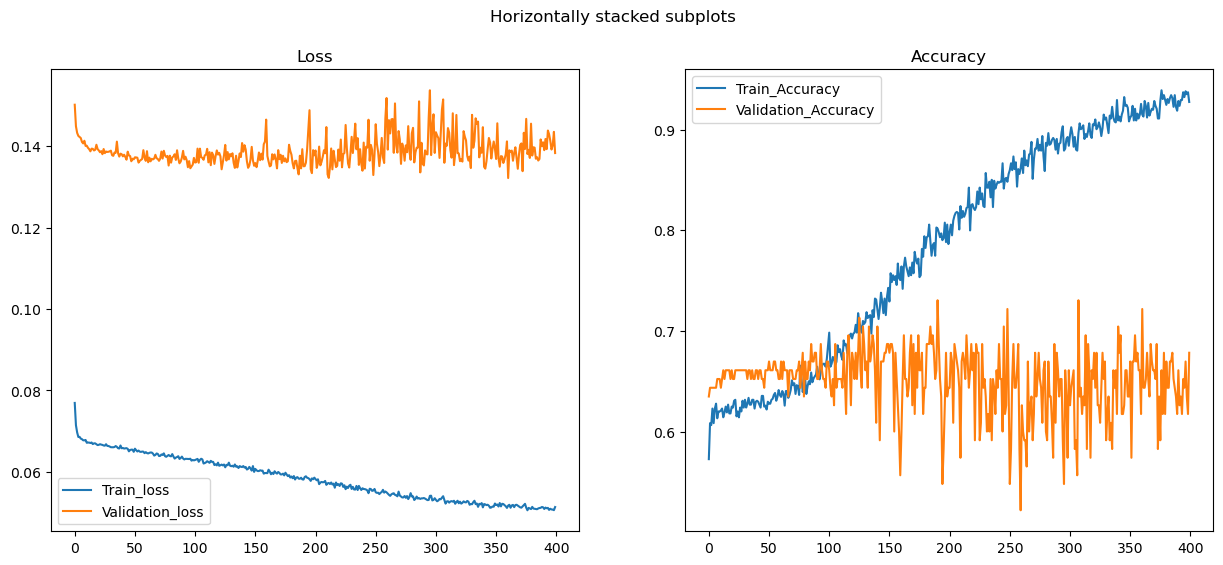

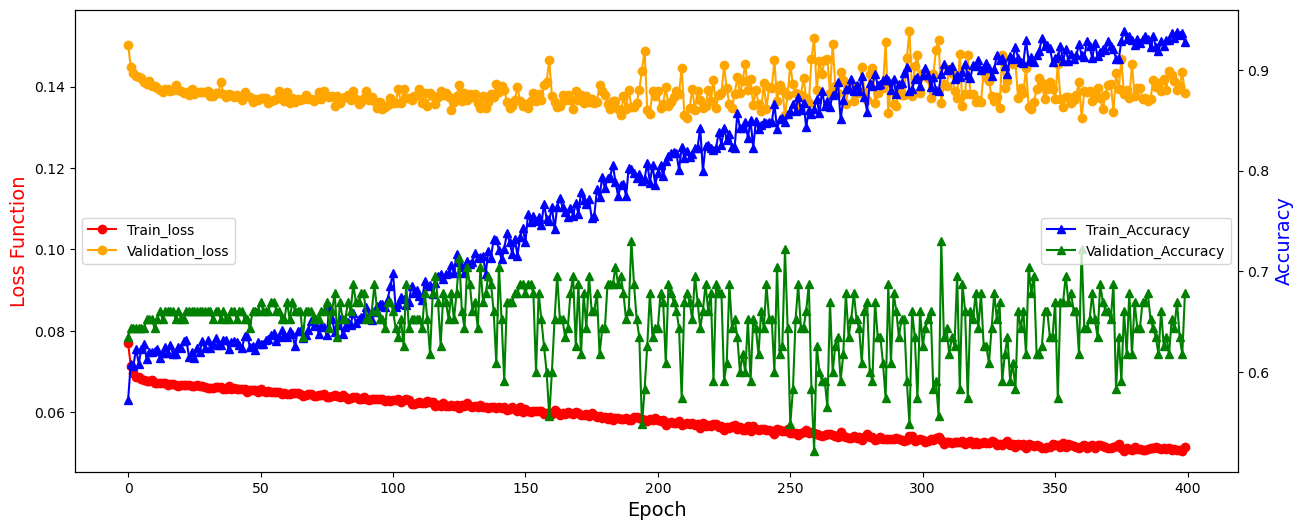

Current time: 163.884 minutes. Time expected till completion: 40.971 minutes

Epoch 401 of 500


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


train loss:  0.05100285251781604
Val loss:  0.13924831100132154
train accuracy:  0.9342359767891683
Val accuracy:  0.6521739130434783
Current time: 164.290 minutes. Time expected till completion: 40.560 minutes

Epoch 402 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.051171824134295406
Val loss:  0.13885690543962562
train accuracy:  0.9226305609284333
Val accuracy:  0.6695652173913044
Current time: 164.694 minutes. Time expected till completion: 40.149 minutes

Epoch 403 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05100544497399542
Val loss:  0.14402220611986907
train accuracy:  0.9303675048355899
Val accuracy:  0.6
Current time: 165.098 minutes. Time expected till completion: 39.738 minutes

Epoch 404 of 500


100%|██████████| 15/15 [00:01<00:00, 13.40it/s]


train loss:  0.05141711846080463
Val loss:  0.13671155805173127
train accuracy:  0.9226305609284333
Val accuracy:  0.6869565217391305
Current time: 165.503 minutes. Time expected till completion: 39.327 minutes

Epoch 405 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.050846312562547756
Val loss:  0.13887424520824265
train accuracy:  0.9342359767891683
Val accuracy:  0.6521739130434783
Current time: 165.910 minutes. Time expected till completion: 38.917 minutes

Epoch 406 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.05045331250768104
Val loss:  0.13836784103642338
train accuracy:  0.9390715667311412
Val accuracy:  0.6695652173913044
Current time: 166.316 minutes. Time expected till completion: 38.507 minutes

Epoch 407 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.050404931578922084
Val loss:  0.13728540254675825
train accuracy:  0.9429400386847195
Val accuracy:  0.6521739130434783
Current time: 166.722 minutes. Time expected till completion: 38.096 minutes

Epoch 408 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.05128092178984814
Val loss:  0.13881345520848815
train accuracy:  0.9245647969052224
Val accuracy:  0.6347826086956522
Current time: 167.128 minutes. Time expected till completion: 37.686 minutes

Epoch 409 of 500


100%|██████████| 15/15 [00:01<00:00, 12.75it/s]


train loss:  0.05078773601142765
Val loss:  0.14310931433802065
train accuracy:  0.9313346228239845
Val accuracy:  0.6347826086956522
Current time: 167.536 minutes. Time expected till completion: 37.276 minutes

Epoch 410 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.050883910757430054
Val loss:  0.13508795499801635
train accuracy:  0.9294003868471954
Val accuracy:  0.6782608695652174
Current time: 167.942 minutes. Time expected till completion: 36.865 minutes

Epoch 411 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.050538678925549266
Val loss:  0.13907787644344827
train accuracy:  0.9381044487427466
Val accuracy:  0.6434782608695652
Current time: 168.348 minutes. Time expected till completion: 36.455 minutes

Epoch 412 of 500


100%|██████████| 15/15 [00:01<00:00, 12.88it/s]


train loss:  0.05029355165345065
Val loss:  0.1378746861996858
train accuracy:  0.9410058027079303
Val accuracy:  0.6521739130434783
Current time: 168.754 minutes. Time expected till completion: 36.044 minutes

Epoch 413 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.05080932125132134
Val loss:  0.14045770220134568
train accuracy:  0.9332688588007737
Val accuracy:  0.6260869565217392
Current time: 169.159 minutes. Time expected till completion: 35.634 minutes

Epoch 414 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.051045045977173735
Val loss:  0.13795532921086187
train accuracy:  0.9264990328820116
Val accuracy:  0.6521739130434783
Current time: 169.565 minutes. Time expected till completion: 35.224 minutes

Epoch 415 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.050286772403311225
Val loss:  0.13726277040398638
train accuracy:  0.9400386847195358
Val accuracy:  0.6521739130434783
Current time: 169.972 minutes. Time expected till completion: 34.813 minutes

Epoch 416 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.050264541311928104
Val loss:  0.14468254939369532
train accuracy:  0.9448742746615088
Val accuracy:  0.6086956521739131
Current time: 170.378 minutes. Time expected till completion: 34.403 minutes

Epoch 417 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.05077758581310914
Val loss:  0.13884405105010322
train accuracy:  0.9352030947775629
Val accuracy:  0.6347826086956522
Current time: 170.784 minutes. Time expected till completion: 33.993 minutes

Epoch 418 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05015941439790929
Val loss:  0.1376573578171108
train accuracy:  0.9448742746615088
Val accuracy:  0.6608695652173913
Current time: 171.190 minutes. Time expected till completion: 33.583 minutes

Epoch 419 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.05008100500650978
Val loss:  0.13977425253909567
train accuracy:  0.9448742746615088
Val accuracy:  0.6434782608695652
Current time: 171.596 minutes. Time expected till completion: 33.173 minutes

Epoch 420 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05105261046374559
Val loss:  0.14102070694384367
train accuracy:  0.9294003868471954
Val accuracy:  0.6434782608695652
Current time: 172.003 minutes. Time expected till completion: 32.763 minutes

Epoch 421 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.0504965974698906
Val loss:  0.14181726497152577
train accuracy:  0.9361702127659575
Val accuracy:  0.6608695652173913
Current time: 172.411 minutes. Time expected till completion: 32.353 minutes

Epoch 422 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.050447391472194826
Val loss:  0.14560772491538007
train accuracy:  0.9439071566731141
Val accuracy:  0.6173913043478261
Current time: 172.816 minutes. Time expected till completion: 31.942 minutes

Epoch 423 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05060210651078584
Val loss:  0.1390197919762653
train accuracy:  0.9381044487427466
Val accuracy:  0.6608695652173913
Current time: 173.225 minutes. Time expected till completion: 31.533 minutes

Epoch 424 of 500


100%|██████████| 15/15 [00:01<00:00, 12.78it/s]


train loss:  0.05055748009820049
Val loss:  0.14038497520529705
train accuracy:  0.9400386847195358
Val accuracy:  0.6347826086956522
Current time: 173.630 minutes. Time expected till completion: 31.122 minutes

Epoch 425 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.050315731959831786
Val loss:  0.1362341652745786
train accuracy:  0.941972920696325
Val accuracy:  0.6782608695652174
Current time: 174.037 minutes. Time expected till completion: 30.712 minutes

Epoch 426 of 500


100%|██████████| 15/15 [00:01<00:00, 12.76it/s]


train loss:  0.050432562136327276
Val loss:  0.13799693636272264
train accuracy:  0.9381044487427466
Val accuracy:  0.6782608695652174
Current time: 174.444 minutes. Time expected till completion: 30.303 minutes

Epoch 427 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.0506210225693723
Val loss:  0.13902525798134183
train accuracy:  0.9323017408123792
Val accuracy:  0.6521739130434783
Current time: 174.851 minutes. Time expected till completion: 29.893 minutes

Epoch 428 of 500


100%|██████████| 15/15 [00:01<00:00, 12.90it/s]


train loss:  0.05080881484241965
Val loss:  0.13749877473582392
train accuracy:  0.9332688588007737
Val accuracy:  0.6434782608695652
Current time: 175.256 minutes. Time expected till completion: 29.482 minutes

Epoch 429 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05033392451948539
Val loss:  0.1349484137866808
train accuracy:  0.937137330754352
Val accuracy:  0.7043478260869566
Current time: 175.663 minutes. Time expected till completion: 29.072 minutes

Epoch 430 of 500


100%|██████████| 15/15 [00:01<00:00, 13.43it/s]


train loss:  0.05095429796314793
Val loss:  0.14008369756781536
train accuracy:  0.925531914893617
Val accuracy:  0.6347826086956522
Current time: 176.070 minutes. Time expected till completion: 28.663 minutes

Epoch 431 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.050499210735815404
Val loss:  0.14075831900472227
train accuracy:  0.9390715667311412
Val accuracy:  0.6434782608695652
Current time: 176.477 minutes. Time expected till completion: 28.253 minutes

Epoch 432 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.050481714409140135
Val loss:  0.1386214121528294
train accuracy:  0.9400386847195358
Val accuracy:  0.6608695652173913
Current time: 176.885 minutes. Time expected till completion: 27.843 minutes

Epoch 433 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.05052102834159217
Val loss:  0.1381492283033288
train accuracy:  0.9400386847195358
Val accuracy:  0.6608695652173913
Current time: 177.291 minutes. Time expected till completion: 27.433 minutes

Epoch 434 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.050186179246847124
Val loss:  0.1383446543113045
train accuracy:  0.9448742746615088
Val accuracy:  0.6695652173913044
Current time: 177.699 minutes. Time expected till completion: 27.023 minutes

Epoch 435 of 500


100%|██████████| 15/15 [00:01<00:00, 13.29it/s]


train loss:  0.0507195828846391
Val loss:  0.13799132316008858
train accuracy:  0.9342359767891683
Val accuracy:  0.6521739130434783
Current time: 178.106 minutes. Time expected till completion: 26.613 minutes

Epoch 436 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.050536339241485304
Val loss:  0.14118559412334275
train accuracy:  0.937137330754352
Val accuracy:  0.6347826086956522
Current time: 178.511 minutes. Time expected till completion: 26.203 minutes

Epoch 437 of 500


100%|██████████| 15/15 [00:01<00:00, 13.15it/s]


train loss:  0.04991958363835539
Val loss:  0.14021171797876772
train accuracy:  0.9477756286266924
Val accuracy:  0.6521739130434783
Current time: 178.916 minutes. Time expected till completion: 25.793 minutes

Epoch 438 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05045650683242532
Val loss:  0.13751296323278675
train accuracy:  0.9410058027079303
Val accuracy:  0.6608695652173913
Current time: 179.321 minutes. Time expected till completion: 25.383 minutes

Epoch 439 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.050610246234060026
Val loss:  0.14103992140811422
train accuracy:  0.9352030947775629
Val accuracy:  0.6608695652173913
Current time: 179.723 minutes. Time expected till completion: 24.973 minutes

Epoch 440 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.05050044294943892
Val loss:  0.13663919386656387
train accuracy:  0.941972920696325
Val accuracy:  0.6608695652173913
Current time: 180.128 minutes. Time expected till completion: 24.563 minutes

Epoch 441 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05057929632050387
Val loss:  0.1368196020955625
train accuracy:  0.937137330754352
Val accuracy:  0.6782608695652174
Current time: 180.532 minutes. Time expected till completion: 24.153 minutes

Epoch 442 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.04976535437185483
Val loss:  0.13347471952438356
train accuracy:  0.9497098646034816
Val accuracy:  0.7217391304347827
Current time: 180.936 minutes. Time expected till completion: 23.743 minutes

Epoch 443 of 500


100%|██████████| 15/15 [00:01<00:00, 12.78it/s]


train loss:  0.050052248589997135
Val loss:  0.13674850256546683
train accuracy:  0.9477756286266924
Val accuracy:  0.6869565217391305
Current time: 181.341 minutes. Time expected till completion: 23.333 minutes

Epoch 444 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.050099879560894844
Val loss:  0.14048337418100107
train accuracy:  0.9429400386847195
Val accuracy:  0.6521739130434783
Current time: 181.747 minutes. Time expected till completion: 22.923 minutes

Epoch 445 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.050319282701905506
Val loss:  0.13926322045533554
train accuracy:  0.9390715667311412
Val accuracy:  0.6608695652173913
Current time: 182.151 minutes. Time expected till completion: 22.513 minutes

Epoch 446 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.05039617597941504
Val loss:  0.1398329180219899
train accuracy:  0.9390715667311412
Val accuracy:  0.6869565217391305
Current time: 182.556 minutes. Time expected till completion: 22.103 minutes

Epoch 447 of 500


100%|██████████| 15/15 [00:01<00:00, 12.85it/s]


train loss:  0.05017341341917012
Val loss:  0.13975860606069151
train accuracy:  0.937137330754352
Val accuracy:  0.6347826086956522
Current time: 182.961 minutes. Time expected till completion: 21.693 minutes

Epoch 448 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.05001002423306729
Val loss:  0.14328191384025243
train accuracy:  0.9468085106382979
Val accuracy:  0.6260869565217392
Current time: 183.366 minutes. Time expected till completion: 21.284 minutes

Epoch 449 of 500


100%|██████████| 15/15 [00:01<00:00, 12.93it/s]


train loss:  0.05066736079968613
Val loss:  0.13358800255733988
train accuracy:  0.9284332688588007
Val accuracy:  0.7130434782608696
Current time: 183.773 minutes. Time expected till completion: 20.874 minutes

Epoch 450 of 500


100%|██████████| 15/15 [00:01<00:00, 13.38it/s]


train loss:  0.05010414653866618
Val loss:  0.1422494131585826
train accuracy:  0.9448742746615088
Val accuracy:  0.6347826086956522
Current time: 184.176 minutes. Time expected till completion: 20.464 minutes

Epoch 451 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.04997964944092402
Val loss:  0.1454900078151537
train accuracy:  0.9487427466150871
Val accuracy:  0.6086956521739131
Current time: 184.582 minutes. Time expected till completion: 20.054 minutes

Epoch 452 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.05040543666199512
Val loss:  0.13530756027802177
train accuracy:  0.9381044487427466
Val accuracy:  0.6782608695652174
Current time: 184.988 minutes. Time expected till completion: 19.645 minutes

Epoch 453 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.05002940606102491
Val loss:  0.14157904023709506
train accuracy:  0.941972920696325
Val accuracy:  0.6260869565217392
Current time: 185.393 minutes. Time expected till completion: 19.235 minutes

Epoch 454 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05041962054988632
Val loss:  0.13890949176705403
train accuracy:  0.9410058027079303
Val accuracy:  0.6695652173913044
Current time: 185.798 minutes. Time expected till completion: 18.825 minutes

Epoch 455 of 500


100%|██████████| 15/15 [00:01<00:00, 12.94it/s]


train loss:  0.05002478825746237
Val loss:  0.1369228445965311
train accuracy:  0.9429400386847195
Val accuracy:  0.6608695652173913
Current time: 186.209 minutes. Time expected till completion: 18.416 minutes

Epoch 456 of 500


100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


train loss:  0.050010256771884525
Val loss:  0.13835010373074075
train accuracy:  0.9477756286266924
Val accuracy:  0.6434782608695652
Current time: 186.617 minutes. Time expected till completion: 18.007 minutes

Epoch 457 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.049985498535794495
Val loss:  0.13643418291340703
train accuracy:  0.9497098646034816
Val accuracy:  0.6869565217391305
Current time: 187.027 minutes. Time expected till completion: 17.598 minutes

Epoch 458 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05012149074091441
Val loss:  0.13887282972750456
train accuracy:  0.9410058027079303
Val accuracy:  0.6695652173913044
Current time: 187.435 minutes. Time expected till completion: 17.188 minutes

Epoch 459 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.05081285412353058
Val loss:  0.14068383963211722
train accuracy:  0.9313346228239845
Val accuracy:  0.6434782608695652
Current time: 187.847 minutes. Time expected till completion: 16.779 minutes

Epoch 460 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.050033294831761076
Val loss:  0.14067097280336463
train accuracy:  0.9497098646034816
Val accuracy:  0.6608695652173913
Current time: 188.256 minutes. Time expected till completion: 16.370 minutes

Epoch 461 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.05027715991497962
Val loss:  0.14178360389626543
train accuracy:  0.9429400386847195
Val accuracy:  0.6260869565217392
Current time: 188.667 minutes. Time expected till completion: 15.961 minutes

Epoch 462 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.050060367215302284
Val loss:  0.13539253421451736
train accuracy:  0.9439071566731141
Val accuracy:  0.6956521739130435
Current time: 189.077 minutes. Time expected till completion: 15.552 minutes

Epoch 463 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.0504898679095034
Val loss:  0.14222442740979402
train accuracy:  0.9390715667311412
Val accuracy:  0.6173913043478261
Current time: 189.487 minutes. Time expected till completion: 15.143 minutes

Epoch 464 of 500


100%|██████████| 15/15 [00:01<00:00, 12.84it/s]


train loss:  0.04981493465674454
Val loss:  0.13971588456112405
train accuracy:  0.9545454545454546
Val accuracy:  0.6521739130434783
Current time: 189.895 minutes. Time expected till completion: 14.733 minutes

Epoch 465 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.04991479889567171
Val loss:  0.13931794736696326
train accuracy:  0.9487427466150871
Val accuracy:  0.6608695652173913
Current time: 190.305 minutes. Time expected till completion: 14.324 minutes

Epoch 466 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.050108068166895114
Val loss:  0.14244677139365156
train accuracy:  0.9400386847195358
Val accuracy:  0.6260869565217392
Current time: 190.716 minutes. Time expected till completion: 13.915 minutes

Epoch 467 of 500


100%|██████████| 15/15 [00:01<00:00, 13.14it/s]


train loss:  0.04985690480044087
Val loss:  0.14402493601259977
train accuracy:  0.9458413926499033
Val accuracy:  0.6173913043478261
Current time: 191.127 minutes. Time expected till completion: 13.506 minutes

Epoch 468 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.05036340437728616
Val loss:  0.13730876912241397
train accuracy:  0.9458413926499033
Val accuracy:  0.6956521739130435
Current time: 191.539 minutes. Time expected till completion: 13.097 minutes

Epoch 469 of 500


100%|██████████| 15/15 [00:01<00:00, 13.18it/s]


train loss:  0.05013173023091064
Val loss:  0.13944534011509108
train accuracy:  0.9390715667311412
Val accuracy:  0.6608695652173913
Current time: 191.949 minutes. Time expected till completion: 12.687 minutes

Epoch 470 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.0497739926067035
Val loss:  0.13789144702579664
train accuracy:  0.9497098646034816
Val accuracy:  0.6695652173913044
Current time: 192.359 minutes. Time expected till completion: 12.278 minutes

Epoch 471 of 500


100%|██████████| 15/15 [00:01<00:00, 13.16it/s]


train loss:  0.05085610190489306
Val loss:  0.14348349623058154
train accuracy:  0.9274661508704062
Val accuracy:  0.6173913043478261
Current time: 192.769 minutes. Time expected till completion: 11.869 minutes

Epoch 472 of 500


100%|██████████| 15/15 [00:01<00:00, 13.06it/s]


train loss:  0.049939462882637745
Val loss:  0.13794913758402286
train accuracy:  0.9429400386847195
Val accuracy:  0.6608695652173913
Current time: 193.179 minutes. Time expected till completion: 11.460 minutes

Epoch 473 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.04981029200830589
Val loss:  0.15167103539342466
train accuracy:  0.9526112185686654
Val accuracy:  0.5652173913043478
Current time: 193.587 minutes. Time expected till completion: 11.050 minutes

Epoch 474 of 500


100%|██████████| 15/15 [00:01<00:00, 13.08it/s]


train loss:  0.04994066696563588
Val loss:  0.14008786626484082
train accuracy:  0.9497098646034816
Val accuracy:  0.6434782608695652
Current time: 193.998 minutes. Time expected till completion: 10.641 minutes

Epoch 475 of 500


100%|██████████| 15/15 [00:01<00:00, 12.83it/s]


train loss:  0.049889314739570395
Val loss:  0.14054890819217847
train accuracy:  0.9506769825918762
Val accuracy:  0.6521739130434783
Current time: 194.408 minutes. Time expected till completion: 10.232 minutes

Epoch 476 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.04979257236596925
Val loss:  0.14294220571932587
train accuracy:  0.9516441005802708
Val accuracy:  0.6260869565217392
Current time: 194.818 minutes. Time expected till completion: 9.823 minutes

Epoch 477 of 500


100%|██████████| 15/15 [00:01<00:00, 12.95it/s]


train loss:  0.050064399924914654
Val loss:  0.144821196017058
train accuracy:  0.9487427466150871
Val accuracy:  0.6347826086956522
Current time: 195.228 minutes. Time expected till completion: 9.413 minutes

Epoch 478 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.05014419728598235
Val loss:  0.14487594677054363
train accuracy:  0.9448742746615088
Val accuracy:  0.591304347826087
Current time: 195.637 minutes. Time expected till completion: 9.004 minutes

Epoch 479 of 500


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


train loss:  0.04977164456415453
Val loss:  0.14178615601166436
train accuracy:  0.9497098646034816
Val accuracy:  0.6260869565217392
Current time: 196.048 minutes. Time expected till completion: 8.595 minutes

Epoch 480 of 500


100%|██████████| 15/15 [00:01<00:00, 13.23it/s]


train loss:  0.04977893967693041
Val loss:  0.13672272433405336
train accuracy:  0.9516441005802708
Val accuracy:  0.6695652173913044
Current time: 196.457 minutes. Time expected till completion: 8.186 minutes

Epoch 481 of 500


100%|██████████| 15/15 [00:01<00:00, 12.89it/s]


train loss:  0.05027668809291242
Val loss:  0.1392280153606249
train accuracy:  0.9390715667311412
Val accuracy:  0.6695652173913044
Current time: 196.867 minutes. Time expected till completion: 7.776 minutes

Epoch 482 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.050699512144583105
Val loss:  0.13711845045504362
train accuracy:  0.9313346228239845
Val accuracy:  0.6869565217391305
Current time: 197.277 minutes. Time expected till completion: 7.367 minutes

Epoch 483 of 500


100%|██████████| 15/15 [00:01<00:00, 13.12it/s]


train loss:  0.050416539324090834
Val loss:  0.13436535234036653
train accuracy:  0.9381044487427466
Val accuracy:  0.7043478260869566
Current time: 197.687 minutes. Time expected till completion: 6.958 minutes

Epoch 484 of 500


100%|██████████| 15/15 [00:01<00:00, 12.97it/s]


train loss:  0.050359149331972726
Val loss:  0.13910950474117112
train accuracy:  0.9448742746615088
Val accuracy:  0.6608695652173913
Current time: 198.097 minutes. Time expected till completion: 6.549 minutes

Epoch 485 of 500


100%|██████████| 15/15 [00:01<00:00, 13.01it/s]


train loss:  0.050575232713319346
Val loss:  0.14223676142485245
train accuracy:  0.9352030947775629
Val accuracy:  0.6260869565217392
Current time: 198.506 minutes. Time expected till completion: 6.139 minutes

Epoch 486 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05005553462749754
Val loss:  0.14223106218420942
train accuracy:  0.9458413926499033
Val accuracy:  0.6434782608695652
Current time: 198.914 minutes. Time expected till completion: 5.730 minutes

Epoch 487 of 500


100%|██████████| 15/15 [00:01<00:00, 13.25it/s]


train loss:  0.04983558576388331
Val loss:  0.137116903844087
train accuracy:  0.9506769825918762
Val accuracy:  0.7043478260869566
Current time: 199.322 minutes. Time expected till completion: 5.321 minutes

Epoch 488 of 500


100%|██████████| 15/15 [00:01<00:00, 13.02it/s]


train loss:  0.049489079753019825
Val loss:  0.1435063134069028
train accuracy:  0.9584139264990329
Val accuracy:  0.6260869565217392
Current time: 199.729 minutes. Time expected till completion: 4.911 minutes

Epoch 489 of 500


100%|██████████| 15/15 [00:01<00:00, 13.10it/s]


train loss:  0.049745257864607144
Val loss:  0.14061999994775523
train accuracy:  0.9526112185686654
Val accuracy:  0.6347826086956522
Current time: 200.138 minutes. Time expected till completion: 4.502 minutes

Epoch 490 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.050014410362483455
Val loss:  0.13559431044951728
train accuracy:  0.9429400386847195
Val accuracy:  0.6695652173913044
Current time: 200.545 minutes. Time expected till completion: 4.093 minutes

Epoch 491 of 500


100%|██████████| 15/15 [00:01<00:00, 13.27it/s]


train loss:  0.049982197049508015
Val loss:  0.14576508636059968
train accuracy:  0.9477756286266924
Val accuracy:  0.6
Current time: 200.953 minutes. Time expected till completion: 3.683 minutes

Epoch 492 of 500


100%|██████████| 15/15 [00:01<00:00, 12.79it/s]


train loss:  0.0501418204210713
Val loss:  0.13712429222853287
train accuracy:  0.9439071566731141
Val accuracy:  0.6782608695652174
Current time: 201.360 minutes. Time expected till completion: 3.274 minutes

Epoch 493 of 500


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


train loss:  0.05012786394161689
Val loss:  0.14037443969560706
train accuracy:  0.941972920696325
Val accuracy:  0.6260869565217392
Current time: 201.769 minutes. Time expected till completion: 2.865 minutes

Epoch 494 of 500


100%|██████████| 15/15 [00:01<00:00, 12.66it/s]


train loss:  0.050116809989313095
Val loss:  0.14675057245337444
train accuracy:  0.9439071566731141
Val accuracy:  0.6
Current time: 202.177 minutes. Time expected till completion: 2.456 minutes

Epoch 495 of 500


100%|██████████| 15/15 [00:01<00:00, 13.11it/s]


train loss:  0.049941187036337195
Val loss:  0.13509737149528836
train accuracy:  0.9497098646034816
Val accuracy:  0.7043478260869566
Current time: 202.586 minutes. Time expected till completion: 2.046 minutes

Epoch 496 of 500


100%|██████████| 15/15 [00:01<00:00, 13.03it/s]


train loss:  0.049658525324421186
Val loss:  0.14396671989689702
train accuracy:  0.9526112185686654
Val accuracy:  0.6173913043478261
Current time: 202.994 minutes. Time expected till completion: 1.637 minutes

Epoch 497 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.050685810973611974
Val loss:  0.13796001983725506
train accuracy:  0.9361702127659575
Val accuracy:  0.6782608695652174
Current time: 203.404 minutes. Time expected till completion: 1.228 minutes

Epoch 498 of 500


100%|██████████| 15/15 [00:01<00:00, 13.00it/s]


train loss:  0.05014868642652058
Val loss:  0.13836853866991788
train accuracy:  0.9477756286266924
Val accuracy:  0.6608695652173913
Current time: 203.813 minutes. Time expected till completion: 0.819 minutes

Epoch 499 of 500


100%|██████████| 15/15 [00:01<00:00, 13.07it/s]


train loss:  0.05029541703672428
Val loss:  0.13947241409965183
train accuracy:  0.9390715667311412
Val accuracy:  0.6347826086956522
Current time: 204.223 minutes. Time expected till completion: 0.409 minutes

Epoch 500 of 500


100%|██████████| 15/15 [00:01<00:00, 13.09it/s]


train loss:  0.04994859392223321
Val loss:  0.14388721973999688
train accuracy:  0.9468085106382979
Val accuracy:  0.6260869565217392
Saving model checkpoint


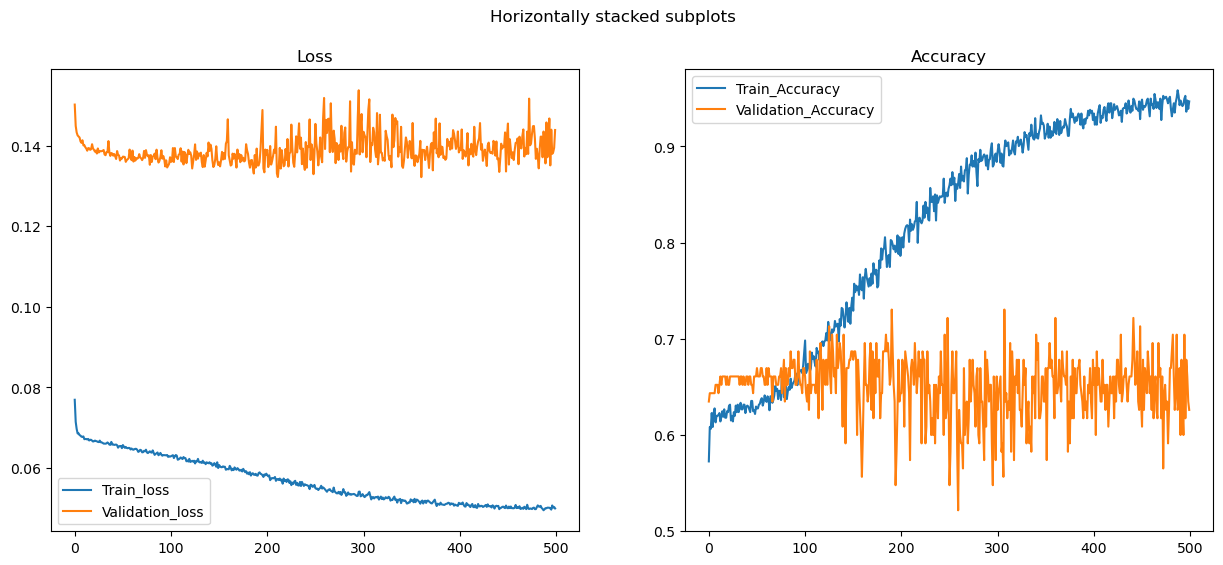

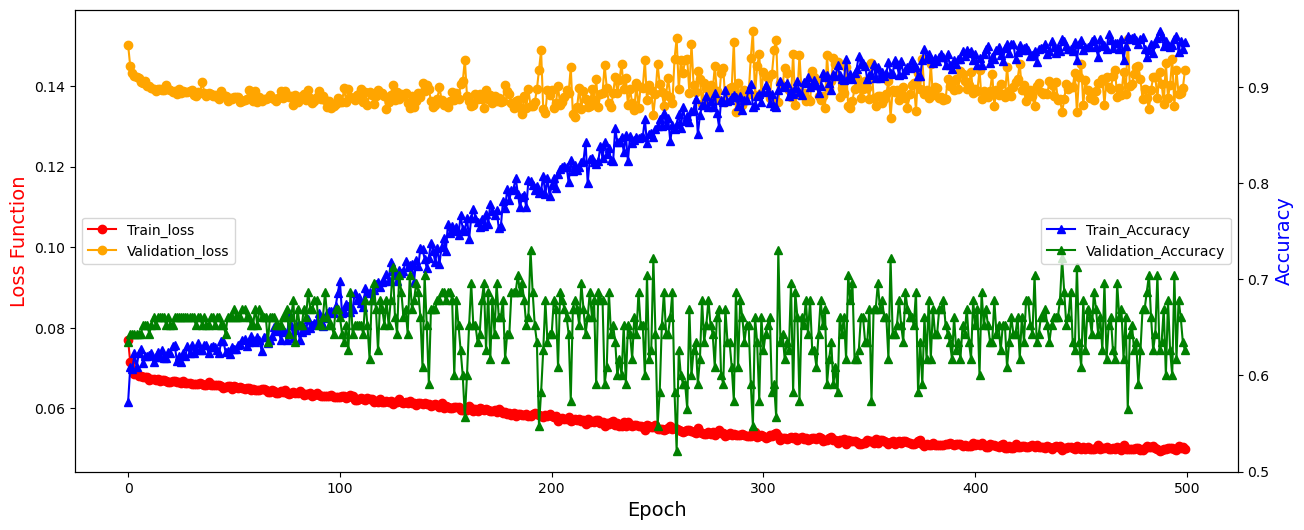

Current time: 204.650 minutes. Time expected till completion: 0.000 minutes
Finished training in: 204.650 minutes


In [15]:
#loader = train_loader # Use the train loader to train
#loader2 = valid_loader
# Main
train_loss, val_loss = [], []
train_accuracy, val_accuracy = [], []

val_loss_withDataAug, val_accuracy_withDataAug = [], []

# Load checkpoints
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="metrics_losss_accuracy.csv"):
        print("Loading Metrics")
        dd = pd.read_csv(model_checkpoints + "metrics_losss_accuracy.csv")
        train_loss = dd["train_loss"].tolist()
        val_loss = dd["val_loss"].tolist()
        train_accuracy = dd["train_accuracy"].tolist()
        val_accuracy = dd["val_accuracy"].tolist()
        
# count time
start = time.time()
#PyTorch - Training the Model
for epoch in range(epoch_check, epochs):
    print()
    # Print current epoch
    print(f"Epoch {epoch + 1} of {epochs}")
    
    # Train model
    modelpy.train()
    running_loss=0
    total=0
    correct=0
    # loop for every training batch (one epoch)
    for bi, data in tqdm(enumerate(train_loader), total=len(train_loader)): # use tqdm package to track running time
        # Get the tensors
        images = data[0].to(device)# use the gpu
        labels = data[1].to(device)# use the gpu
        
        # in pytorch you have assign the zero for gradien in any sub epoch
        #optim.zero_grad()
        #create the output from the CNN base on the give batch images
        out = modelpy(images)
        # count the loss function 
        loss = criterion(out, labels)
        
        ######################
        optim.zero_grad()#################
        ######################
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        
        # add new value to the main loss
        running_loss += loss.item()
        
        # calculate accuracy
        predictions = torch.argmax(out, dim=1)
        total += labels.size(0)
        correct +=(predictions == labels).sum().item()
        
        
    train_epoch_loss = running_loss/len(train_loader.dataset)
    
    train_epoch_accuracy = correct/total
    
    modelpy.eval()
    running_loss = 0.0
    correct=0
    total=0
    with torch.no_grad():
        for bi, data in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            # Get the tensors
            images = data[0].to(device)# use the gpu
            label = data[1].to(device)# use the gpu
            
            #create the output from the CNN base on the give batch images
            outputs = modelpy(images)
            # count the loss function
            loss = criterion(outputs, label)
            
            # Add loss of each item (total items in a batch = batch size) .
            running_loss += loss.item()
            
            # calculate accuracy
            predictions = torch.argmax(outputs, dim=1)
            total += label.size(0)
            correct +=(predictions == label).sum().item()
            
            
    val_epoch_loss = running_loss/len(valid_loader.dataset) 
    val_epoch_accuracy = correct/total

    
    
    print("train loss: ", train_epoch_loss)
    print("Val loss: ", val_epoch_loss)
    print("train accuracy: ", train_epoch_accuracy)
    print("Val accuracy: ", val_epoch_accuracy)

    
    
    # save results
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_accuracy.append(val_epoch_accuracy)

    
    # Save model with all information every 100 epochs. Can be used 
    # resuming training. optim
    if (epoch+1) % checkpoints_save == 0: # checkpoints_save
        # Save Model
        print("Saving model checkpoint")
        end = time.time()
        time_elapsed = (end-start)+previous_time
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt.pth")
        # save the metrics
        save_metrics(train_loss, val_loss, train_accuracy, val_accuracy, path = model_checkpoints + "metrics_losss_accuracy.csv")
        
        # save model at epoch
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt_"+str(epoch+1)+".pth")
        
        # Cheack the evolution at this point
        plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)
        
        
    ep_time = time.time()
    print(f"Current time: {(((ep_time-start)+previous_time)/60):.3f} minutes. Time expected till completion: {(((((ep_time-start)+previous_time)/(epoch + 1)) * (epochs-(epoch + 1)))/60):.3f} minutes")
    
end = time.time()
print(f"Finished training in: {(((end-start)+previous_time)/60):.3f} minutes") 

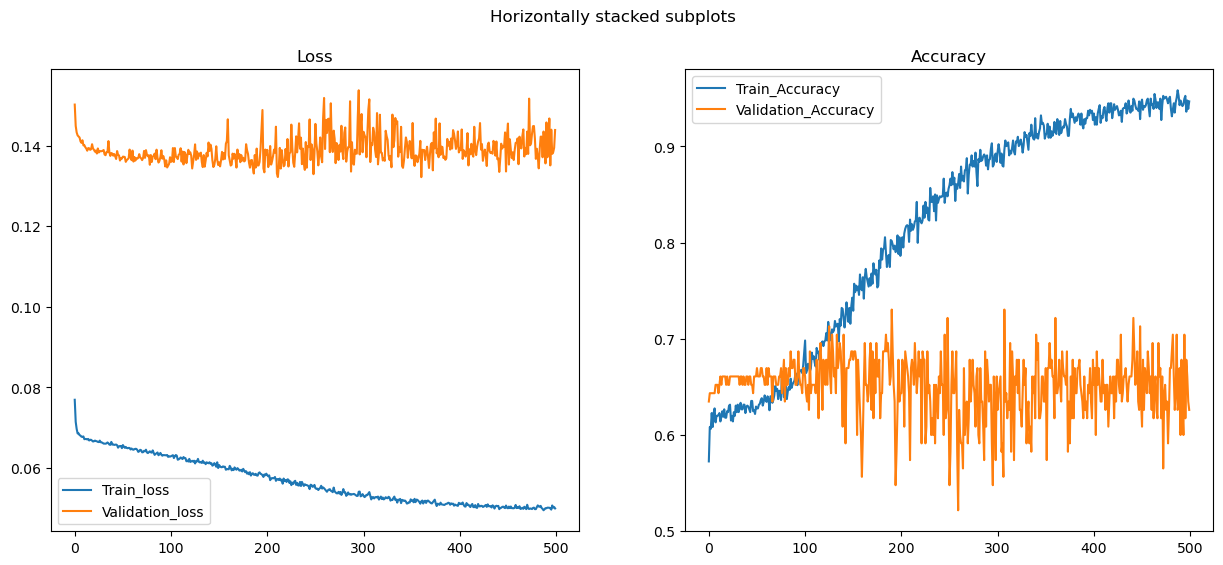

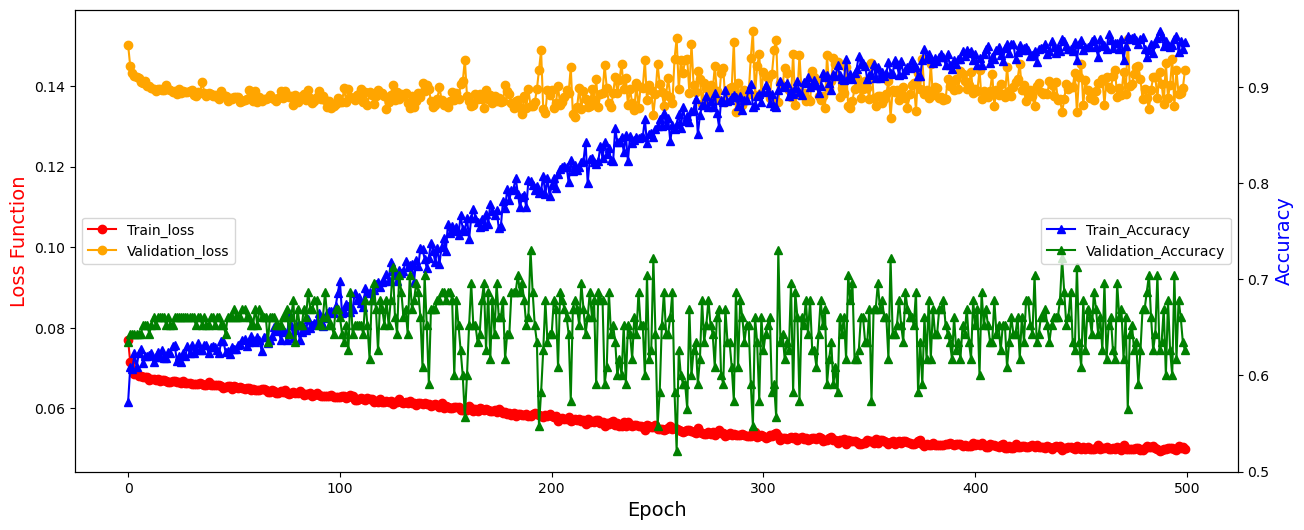

In [16]:
plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)

### Save Model

In [17]:
torch.save(modelpy.state_dict(), model_checkpoints + "saved_model_state_dict.pt")
torch.save(modelpy, model_checkpoints + "saved_model.pt")

# 3. Evaluate your model using the developed software

In [18]:
# Calculate accuracy for Validation and Train sets
accuracy_given_set(modelpy, train_loader, device, name="Train")
accuracy_given_set(modelpy, valid_loader, device, name="Validation")

Accuracy of the network on the 1034 Train instances: 94.39071566731141%
Accuracy of the network on the 115 Validation instances: 62.608695652173914%


In [19]:
# Import the test dataset
size_of_resized_img = (224,224) 
test_data, test_names = import_test_folder_dataset_2(test_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", test_data.shape)
print("Dim of Lables: ", test_names.shape)

Dim of Data:  (380, 224, 224, 3)
Dim of Lables:  (380,)


In [20]:
# Create the dataset object
test_Dataset = Data_test_2(test_data, test_names, img_transform_val)#img_transform_val
print("Test len: ",len(test_Dataset))

Test len:  380


In [21]:
# Make the predictions for the test dataset
predictions_list, names = make_predictions(modelpy=modelpy, dataset=test_Dataset, device=device)
len(predictions_list)

380

In [22]:
# Save the Predictions
save_predictions_as_csv(names=names, predictions=predictions_list, name="11_18Conv_6Res_128FChannels_6Batch.csv")

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points